<a href="https://colab.research.google.com/github/muchlisam17/PBI-VIX-Data-Scientist-IDX-Partners-x-Rakamin-Academy/blob/main/Bank%20Revenue%20Decline%20Classification/Bank_Revenue_Decline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Revenue Decline Classification**

## About Dataset

### About Dataset

**Deskripsi:**
Bank swasta cabang Bandung mengalami penurunan pendapatan dan mereka ingin mengetahui apa tindakan selanjutnya. Dan setelah penyelidikan, mereka menemukan bahwa pelanggan mereka tidak cukup berinvestasi untuk simpanan jangka panjang, seperti deposito jangka panjang. Untuk mengatasi masalah ini, bank ingin mengidentifikasi pelanggan yang ada yang memiliki peluang lebih tinggi untuk berlangganan deposito jangka panjang. Dengan mengetahui pelanggan potensial ini, bank akan dapat memfokuskan upaya pemasaran pada segmen yang tepat dan meningkatkan jumlah langganan deposito jangka panjang.

**Description:**
The private bank Bandung's branch experienced a revenue decline and they would like to know what actions to take. After investigation, they found that their customers were not investing enough in long-term savings, such as long-term deposits. To overcome this problem, the bank would like to identify existing customers that have higher chance to subscribe for a long-term deposits. By knowing these potential customers, the bank will be able to focus marketing efforts on the right segments and increase the number of long-term deposit subscriptions.

#### Dependencies

You Can Download The Dataset from Here

Train:

https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?resource=download&select=new_train.csv

Test:

https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?resource=download&select=new_test.csv

### Information of The Dataset

Data tersebut terkait dengan kampanye pemasaran langsung dari bank swasta cabang Bandung. Kampanye pemasaran tersebut didasarkan pada panggilan telepon. Sering kali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan dilanggan ('ya') atau tidak ('tidak').

Ada dua set data: train.csv dengan semua contoh (32950) dan 21 input termasuk fitur target, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]

test.csv yang merupakan data uji yang terdiri dari 8238 observasi dan 20 fitur tanpa fitur target

Tujuan:- Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

Set data berisi data train dan data uji. Fitur data train tercantum di bawah ini. Dan data uji telah diproses sebelumnya.

---------------------------------------------------------------------------------

The data is related to direct marketing campaigns of a private bank Bandung's branch. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

**Features**

Feature Feature_Type Description

`age` `numeric` : Age of A Person

`job` `categorical, nominal` : Type of Job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

`marital` `categorical, nominal` : Marital Status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

`education` `categorical, nominal` : ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

`default` `categorical, nominal` : Has Credit in Default? ('no','yes','unknown')

`housing` `categorical, nominal` : Has Housing Loan? ('no','yes','unknown')

`loan` `categorical, nominal` : Has Personal Loan? ('no','yes','unknown')

`contact` `categorical, nominal` : Contact Communication Type ('cellular','telephone')

`month` `categorical, ordinal` : Last Contact Month of Year ('mar', 'apr', …, 'nov', 'dec')

`day_of_week` `categorical, ordinal` : Last Contact Day of The Week ('mon','tue','wed','thu','fri')

`duration` `numeric` : Last Contact Duration, in Seconds. Important Note: This Attribute Highly Affects The Output Target (e.g., if duration=0 then y='no')

`campaign` `numeric` : Number of Contacts Performed During This Campaign and For This Client (includes last contact)

`pdays` `numeric` : Number of Days That Passed by After The Client was Last Contacted from A Previous Campaign (999 means client was not previously contacted)

`previous` `numeric` : Number of Contacts Performed Before This Campaign and For This Client

`poutcome` `categorical, nominal` : Outcome of The Previous Marketing Campaign ('failure','nonexistent','success')

**Target Variable (Desired Output)**

Feature Feature_Type Description

`y` `binary` : Has The Client Subscribed A Term Deposit? ('yes','no')

### Import Libraries


In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set Options to Display All Columns and Rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Install for Download DataFrame Tables to PNG Format
!apt install firefox firefox-geckodriver
!pip install dataframe_image selenium
import dataframe_image as dfi
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package firefox-geckodriver is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  firefox

E: Package 'firefox-geckodriver' has no installation candidate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [3]:
# Import Data Modeling Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load Dataset

In [4]:
# Load The Dataset
data = pd.read_csv("/content/new_train.csv")

In [5]:
# Check Shape of Dataset
print("shape of the data:", data.shape)
data.head(8)

shape of the data: (32950, 16)


age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   
5   29        admin.    single  university.degree       no      no   no   
6   26       student    single           basic.9y       no      no   no   
7   30   blue-collar   married           basic.4y       no     yes   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   
5   cellular   aug         wed       256         2    999         0   
6  telephone   aug         wed       449         1    999         0   
7   cellular   nov         wed       126         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no  
5  nonexistent   no  
6  nonexistent  yes  
7  nonexistent   no

In [6]:
# Save data.head(8) as PNG Format (PICTURE)
dfi.export(data.head(8), 'data-head 8 rows.png', table_conversion='selenium')

In [7]:
# Save data.head(8) as XLSX Format (TABLE)
data.head(8).to_excel("data-head 8 rows.xlsx")

In [ ]:
# Interactive Sheet, The UI are From Google Spreadsheet. New Feature from Google Colab
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=data)

### Check for The Names in The Column

In [8]:
# Check Jumlah Kolom
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


### Dataset Description

In [9]:
# Check Statistik/Standard Deviasi Tapi Tabelnya ditranspose
data.describe(include="all").T

count unique                top   freq        mean         std  \
age          32950.0    NaN                NaN    NaN   40.014112   10.403636   
job            32950     12             admin.   8314         NaN         NaN   
marital        32950      4            married  19953         NaN         NaN   
education      32950      8  university.degree   9736         NaN         NaN   
default        32950      3                 no  26007         NaN         NaN   
housing        32950      3                yes  17254         NaN         NaN   
loan           32950      3                 no  27131         NaN         NaN   
contact        32950      2           cellular  20908         NaN         NaN   
month          32950     10                may  11011         NaN         NaN   
day_of_week    32950      5                thu   6857         NaN         NaN   
duration     32950.0    NaN                NaN    NaN  258.127466  258.975917   
campaign     32950.0    NaN                NaN    NaN    2.560607    2.752326   
pdays        32950.0    NaN                NaN    NaN  962.052413  187.951096   
previous     32950.0    NaN                NaN    NaN    0.174719    0.499025   
poutcome       32950      3        nonexistent  28416         NaN         NaN   
y              32950      2                 no  29238         NaN         NaN   

              min    25%    50%    75%     max  
age          17.0   32.0   38.0   47.0    98.0  
job           NaN    NaN    NaN    NaN     NaN  
marital       NaN    NaN    NaN    NaN     NaN  
education     NaN    NaN    NaN    NaN     NaN  
default       NaN    NaN    NaN    NaN     NaN  
housing       NaN    NaN    NaN    NaN     NaN  
loan          NaN    NaN    NaN    NaN     NaN  
contact       NaN    NaN    NaN    NaN     NaN  
month         NaN    NaN    NaN    NaN     NaN  
day_of_week   NaN    NaN    NaN    NaN     NaN  
duration      0.0  103.0  180.0  319.0  4918.0  
campaign      1.0    1.0    2.0    3.0    56.0  
pdays         0.0  999.0  999.0  999.0   999.0  
previous      0.0    0.0    0.0    0.0     7.0  
poutcome      NaN    NaN    NaN    NaN     NaN  
y             NaN    NaN    NaN    NaN     NaN

In [10]:
# Save data.describe(include="all").T as PNG Format (PICTURE)
dfi.export(data.describe(include="all").T, 'data-describe.png', table_conversion='selenium')

In [11]:
# Save data.describe(include="all").T as PNG Format (TABLE)
data.describe(include="all").T.to_excel("data-describe.xlsx")

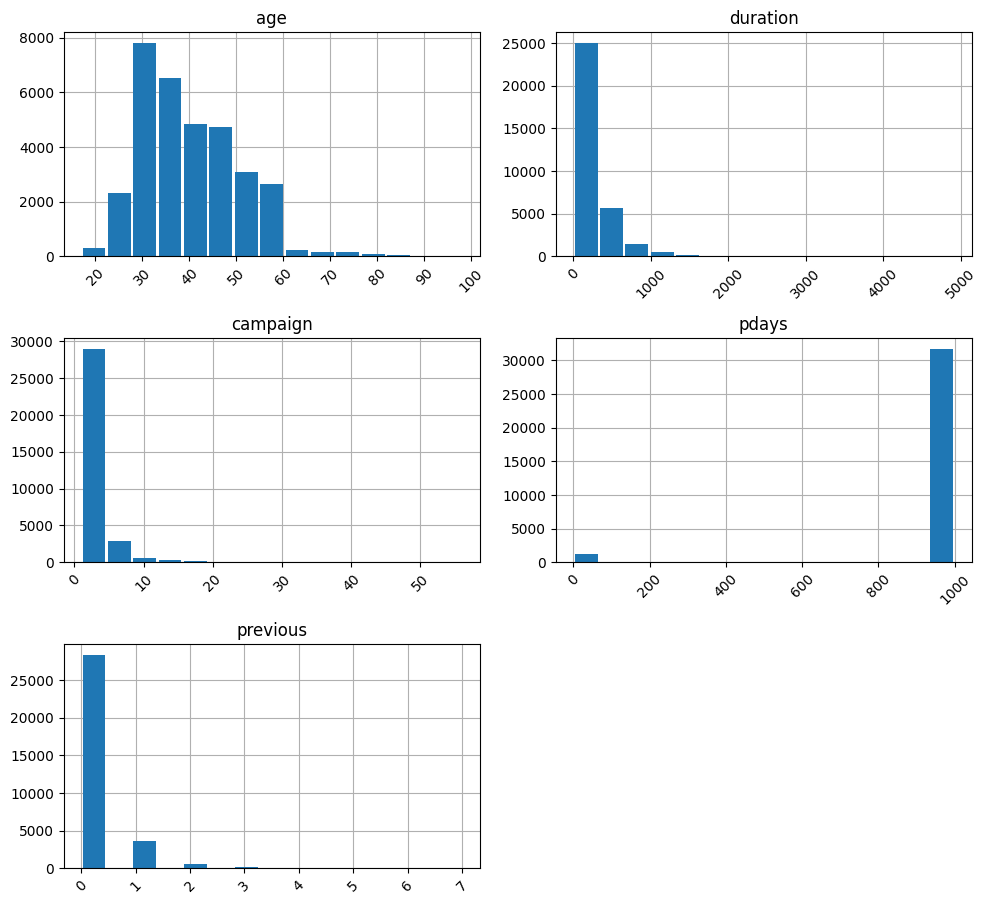

In [12]:
# Membuat Plot Histogram dari Data Kolom Numerik untuk Memeriksa Distribusi Data
data.hist(figsize=(10, 15), layout=(5, 2), grid=True, color='#1F77B4', zorder=2, rwidth=0.9, bins=15, xrot=45)

# Menjauhkan Grafik Agar Tidak Bertabrakan
plt.tight_layout()

# Save data.hist as PNG format
plt.savefig("data-hist.png")

#### Mengecek Standard Deviasi dan Sebaran Data dari Column 'Campaign'

In [13]:
data['campaign'][data['y'] == "no"].describe()

count    29238.000000
mean         2.624803
std          2.855207
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [14]:
data['campaign'][data['y'] == "yes"].describe()

count    3712.000000
mean        2.054957
std         1.656486
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64

#### Mengecek Perbandingan Column 'Y' (Target Column | Sudahkah Klien Berlangganan Deposito Jangka Panjang?) dengan Column 'Month'

In [15]:
# Mengecek Perbandingan Column 'Y' (Target Column | Sudahkah Klien Berlangganan Deposito Jangka Panjang?) dengan Column 'Month'

data.groupby("y")["month"].value_counts().unstack()
# data.groupby("y")["month"].value_counts(normalize=True).unstack()*100

month   apr   aug  dec   jul   jun  mar    may   nov  oct  sep
y                                                             
no     1658  4417   71  5231  3806  219  10312  2934  333  257
yes     427   531   72   532   441  217    699   332  254  207

#### Mengecek Perbandingan Column 'Y' (Target Column | Has The Client Subscribed A Term Deposit?) dengan Column 'Job'

In [16]:
# Mengecek Perbandingan Column 'Y' (Target Column | Has The Client Subscribed A Term Deposit?) dengan Column 'Job'
data.groupby("y")["job"].value_counts().unstack()

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     7244         6926          1060        769        2076     1018   
yes    1070          515           100         86         269      348   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no             980      2942      494        4815         682      232  
yes            119       254      217         585         116       33

#### Mengecek Perbandingan Column 'Marital' dengan Column 'Age'

In [17]:
# Mengecek Perbandingan Column 'Marital' dengan Column 'Age'

# data.groupby("marital")["age"].value_counts()
data.groupby("marital")["age"].value_counts().unstack()
# data.groupby("y")["month"].value_counts(normalize=True).unstack()*100

age        17    18    19    20    21    22     23     24     25     26  \
marital                                                                   
divorced  NaN   NaN   NaN   NaN   NaN   NaN    NaN    2.0   15.0   11.0   
married   NaN   NaN   NaN   NaN   6.0  13.0   23.0   65.0  126.0  165.0   
single    3.0  22.0  37.0  52.0  74.0  89.0  158.0  314.0  345.0  407.0   
unknown   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    2.0    NaN   

age          27     28     29     30     31     32     33     34     35  \
marital                                                                   
divorced    8.0   17.0   52.0   73.0  115.0   97.0  115.0  104.0  135.0   
married   189.0  303.0  433.0  612.0  722.0  749.0  790.0  870.0  871.0   
single    476.0  479.0  683.0  677.0  709.0  624.0  532.0  423.0  409.0   
unknown     2.0    NaN    3.0    3.0    5.0    4.0    6.0    7.0    2.0   

age          36     37     38     39     40     41     42     43     44  \
marital                                                                   
divorced  120.0  132.0  136.0  124.0  122.0  160.0  143.0   85.0  130.0   
married   894.0  728.0  710.0  774.0  629.0  696.0  641.0  615.0  550.0   
single    386.0  299.0  292.0  233.0  193.0  174.0  131.0  127.0  146.0   
unknown     2.0    1.0    1.0    NaN    1.0    1.0    NaN    NaN    NaN   

age          45     46     47     48     49     50     51     52     53  \
marital                                                                   
divorced  137.0  127.0  123.0  113.0  120.0   98.0  103.0  119.0  114.0   
married   626.0  617.0  546.0  590.0  493.0  545.0  461.0  461.0  429.0   
single    105.0   78.0   78.0   72.0   54.0   60.0   37.0   43.0   39.0   
unknown     3.0    1.0    NaN    NaN    3.0    4.0    NaN    2.0    1.0   

age          54     55     56     57     58     59     60    61    62    63  \
marital                                                                       
divorced  106.0  102.0  101.0   89.0   81.0   70.0   34.0   5.0   2.0   4.0   
married   415.0  395.0  439.0  387.0  349.0  290.0  182.0  53.0  50.0  37.0   
single     33.0   28.0   21.0   45.0   22.0   13.0    7.0   3.0   1.0   NaN   
unknown     2.0    2.0    1.0    NaN    3.0    1.0    NaN   NaN   NaN   NaN   

age         64    65    66    67    68    69    70    71    72    73    74  \
marital                                                                      
divorced   3.0   2.0   5.0   5.0   4.0   6.0  10.0   2.0   7.0   5.0   4.0   
married   40.0  34.0  34.0  18.0  20.0  19.0  27.0  37.0  22.0  24.0  16.0   
single     NaN   2.0   4.0   1.0   4.0   NaN   NaN   6.0   2.0   1.0   NaN   
unknown    NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age         75    76    77    78    79    80   81   82   83   84   85   86  \
marital                                                                      
divorced   6.0   4.0   6.0   7.0   NaN  11.0  7.0  6.0  5.0  5.0  2.0  1.0   
married   10.0  24.0  11.0  13.0  11.0  15.0  7.0  8.0  7.0  NaN  9.0  4.0   
single     NaN   1.0   1.0   NaN   NaN   NaN  NaN  1.0  NaN  NaN  NaN  1.0   
unknown    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

age        87    88   89   91   98  
marital                             
divorced  1.0  15.0  2.0  NaN  NaN  
married   NaN   2.0  NaN  1.0  1.0  
single    NaN   NaN  NaN  NaN  NaN  
unknown   NaN   NaN  NaN  NaN  NaN

### Check DataFrame Info

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


### Check Missing Value

In [19]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

No Missing Value

### Check for Data Null

In [20]:
# Check Null value
data.loc[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, y]
Index: []

No Data Null

### Check for Duplicate Data

In [21]:
# Check Duplicate Data
print(data.duplicated().value_counts())
data.loc[data.duplicated()]

False    32942
True         8
Name: count, dtype: int64


age          job   marital            education  default housing loan  \
1923    39       admin.   married    university.degree       no      no   no   
12252   36      retired   married              unknown       no      no   no   
20067   35       admin.   married    university.degree       no     yes   no   
24831   41   technician   married  professional.course       no     yes   no   
28456   55     services   married          high.school  unknown      no   no   
29543   47   technician  divorced          high.school       no     yes   no   
30807   71      retired    single    university.degree       no      no   no   
32607   39  blue-collar   married             basic.6y       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
1923    cellular   nov         tue       123         2    999         0   
12252  telephone   jul         thu        88         1    999         0   
20067   cellular   may         fri       348         4    999         0   
24831   cellular   aug         tue       127         1    999         0   
28456   cellular   aug         mon        33         1    999         0   
29543   cellular   jul         thu        43         3    999         0   
30807  telephone   oct         tue       120         1    999         0   
32607  telephone   may         thu       124         1    999         0   

          poutcome   y  
1923   nonexistent  no  
12252  nonexistent  no  
20067  nonexistent  no  
24831  nonexistent  no  
28456  nonexistent  no  
29543  nonexistent  no  
30807  nonexistent  no  
32607  nonexistent  no

Ada 8 data yang terduplikasi/data ganda

### Check for Class Imbalance

Label y, yes and no

In [22]:
# Target Class Count
data["y"].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

In [23]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

Datanya cenderung tidak seimbang

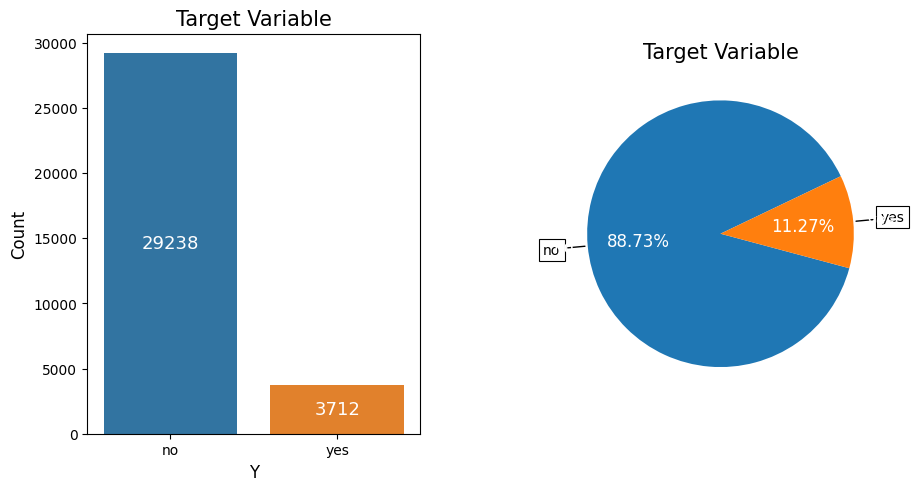

In [24]:
# Menampilkan Grafik Target Class
plt.figure(figsize=(10, 5))

# Subplot #1
# Count of Class in Target Variable (Y)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=data["y"], palette=['#1F77B4', '#FF7F0E'])
for label in ax.containers:
  ax.bar_label(label, color='white', label_type='center', fontsize=13)

plt.xlabel("Y", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target Variable", fontsize=15)

# Subplot #2
# Percentage of Class in Target Variable (Y)
plt.subplot(1, 2, 2)
df = data['y'].value_counts()
label = df.index
colors = ['#1F77B4', '#FF7F0E']

wedges, texts, autotexts = plt.pie(df, labels=label, autopct='%1.2f%%',
                                   pctdistance=0.62, textprops=dict(color='white', fontsize=12),
                                   startangle=345, counterclock=False, colors=colors)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(label[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.35*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Target Variable', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Target Variable.png")

# Percentage of Class Present in Target Variable (Y)
# print("Percentage of NO and YES\n", data["y"].value_counts()/len(data)*100)
# print("\n\nCount of NO and YES\n", data["y"].value_counts())

Perbandingan rasio ketidakseimbangan variabel target kolom 'Y' (Sudahkah Berlangganan Deposito Jangka Panjang?) adalah 88.73:11.27

## Exploratory Data Analysis

### Univariate Analysis: for Categorical Data

In [25]:
# Identifying The Categorical Variables
cat_var = data.select_dtypes(include=["object"]).columns
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [26]:
example_cat_var = data.select_dtypes(include=["object"])
example_cat_var.head(8)

job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   
5        admin.    single  university.degree       no      no   no   cellular   
6       student    single           basic.9y       no      no   no  telephone   
7   blue-collar   married           basic.4y       no     yes   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  
5   aug         wed  nonexistent   no  
6   aug         wed  nonexistent  yes  
7   nov         wed  nonexistent   no

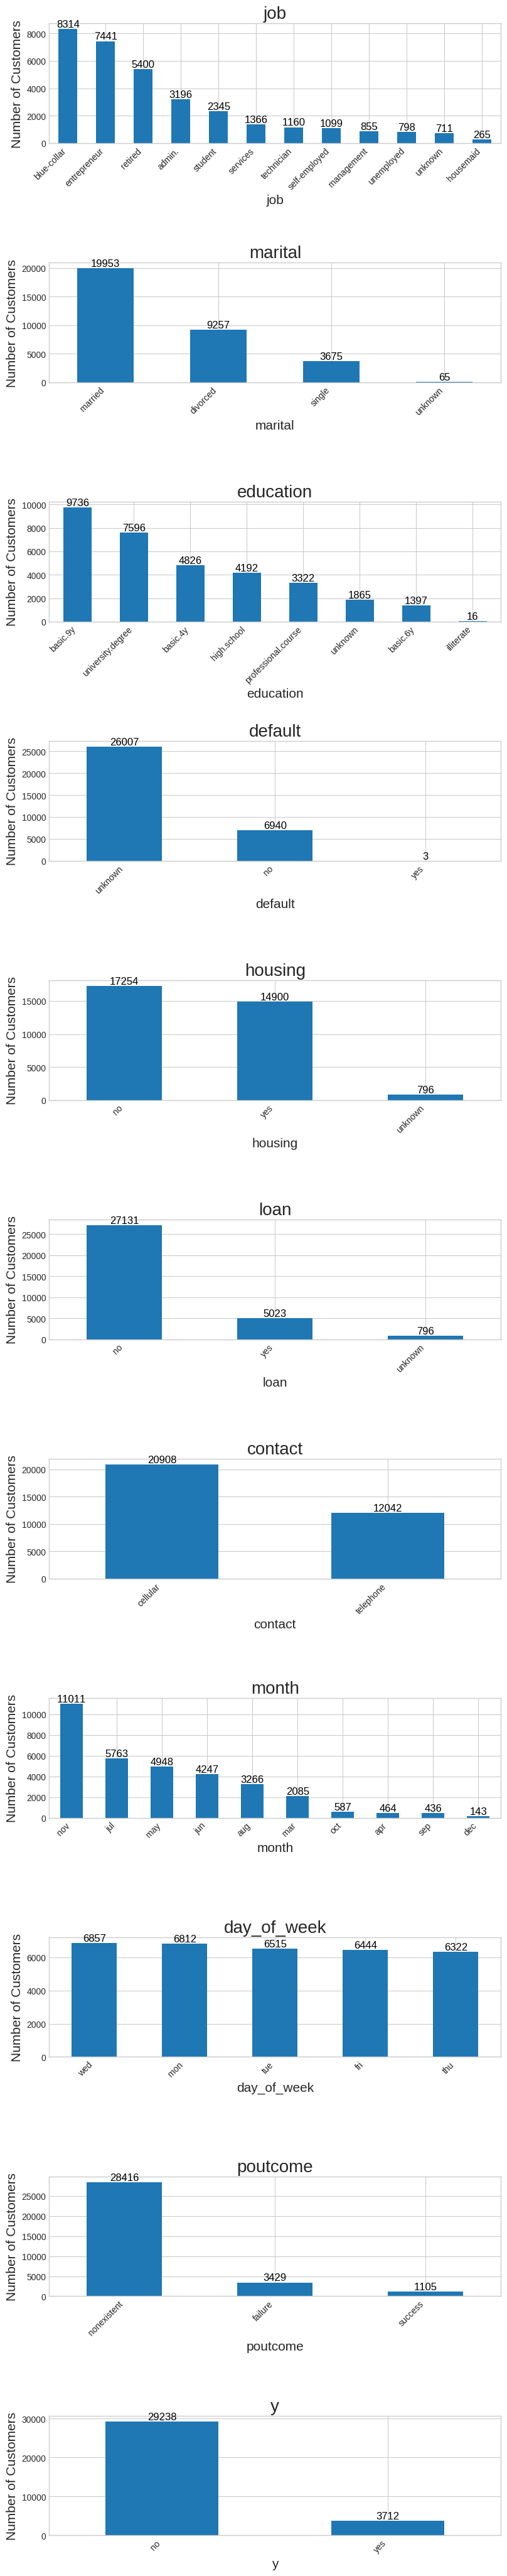

In [27]:
# Ploting Bar Chart for Each Categorical Variable
plt.style.use("seaborn-whitegrid")

def univariate_categorical(data, cat_var):
  """
  Plots bar charts for each categorical variable in a pandas DataFrame
  and saves them all in one PNG file.

  Args:
      data (pandas.DataFrame): The data to analyze.
      cat_var (list): A list of categorical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Categorical.png".
      figsize (tuple, optional): The figure size for each subplot. Defaults to (12, 8).
  """

  # Create a single figure with subplots
  fig, axes = plt.subplots(nrows=len(cat_var), figsize=(9,50))  # Avoid overlapping x-axis labels

  # Iterate through categorical variables and create subplots
  for i, column in enumerate(cat_var):
    data[column].value_counts().plot(kind="bar", color='#1F77B4', ax=axes[i])
    # Get unique categories (ticks) for rotation (handles empty or single-value cases)
    categories = data[column].unique()
    if len(categories) > 1:  # Rotate only if there are multiple categories
      axes[i].set_xticks(range(len(categories)))  # Set tick positions explicitly
      axes[i].set_xticklabels(categories, rotation=45, ha='right')  # Set labels with alignment
    for label in axes[i].containers:
      axes[i].bar_label(label, color='black', label_type='edge', fontsize=12)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel("Number of Customers", fontsize=15)
    axes[i].set_title(column, fontsize=20)

  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image
  plt.savefig("Univariate Analysis Categorical Data.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
univariate_categorical(data, cat_var)

#### Kesimpulan Analisis Univariate pada Data Kategorikal



Hasil Analisis Demografi Nasabah Bank:

1. Profesi Nasabah:

> Profesi paling dominan dari nasabah kita adalah administrasi, pekerjaan blue-collar, teknisi, dan jasa.

2. Status Pernikahan Nasabah:

> Sebagian besar nasabah adalah yang sudah menikah.

3. Kredit Bermasalah:

> Mayoritas nasabah tidak memiliki kredit dalam keadaan bermasalah.

3. Pembiayaan yang Diajukan Nasabah:

> Banyak nasabah sebelumnya telah mengajukan pinjaman perumahan, tetapi jumlah yang mengajukan pinjaman pribadi sangat sedikit.

4. Metode Komunikasi:

> Ponsel adalah metode yang paling disukai untuk berkomunikasi dengan nasabah.

5. Waktu Komunikasi:

> Banyak nasabah telah dihubungi pada bulan Mei.

6. Ketidakseimbangan Variabel Target:

> Plot untuk variabel target menunjukkan ketidakseimbangan yang cukup besar dalam variabel target. Hal ini menandakan bahwa jumlah nasabah yang berlangganan produk tertentu dan yang tidak berlangganan berbeda secara signifikan.

Insight-insight di atas memberikan gambaran demografi dari nasabah bank yang telah diamati. Analisis ini dapat membantu bank dalam merencanakan strategi pemasaran yang lebih efektif, seperti menargetkan kampanye kepada nasabah yang memiliki kesempatan lebih tinggi untuk berlangganan produk tertentu atau mencari cara-cara baru untuk mencapai nasabah dengan lebih efisien. Selain itu, pengenalan keseimbangan yang tidak seimbang pada variabel target dapat menandakan kebutuhan untuk teknik pengelompokan atau penyesuaian lebih lanjut saat melakukan analisis lanjutan atau membangun model prediksi.

### Univariate Analysis: for Numerical Data

In [28]:
# Identifying The Numerical Variables
num_var = data.select_dtypes(include=np.number)
num_var.head(8)

age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0
5   29       256         2    999         0
6   26       449         1    999         0
7   30       126         2    999         0

In [29]:
# Interactive Sheet, The UI are From Google Spreadsheet. New Feature from Google Colab
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=num_var)

Statistic summary of age
Average: 40.01
Standard deviation: 10.40
Median: 38.00
Mode: 31
------------------------------
Statistic summary of duration
Average: 258.13
Standard deviation: 258.98
Median: 180.00
Mode: 90
------------------------------
Statistic summary of campaign
Average: 2.56
Standard deviation: 2.75
Median: 2.00
Mode: 1
------------------------------


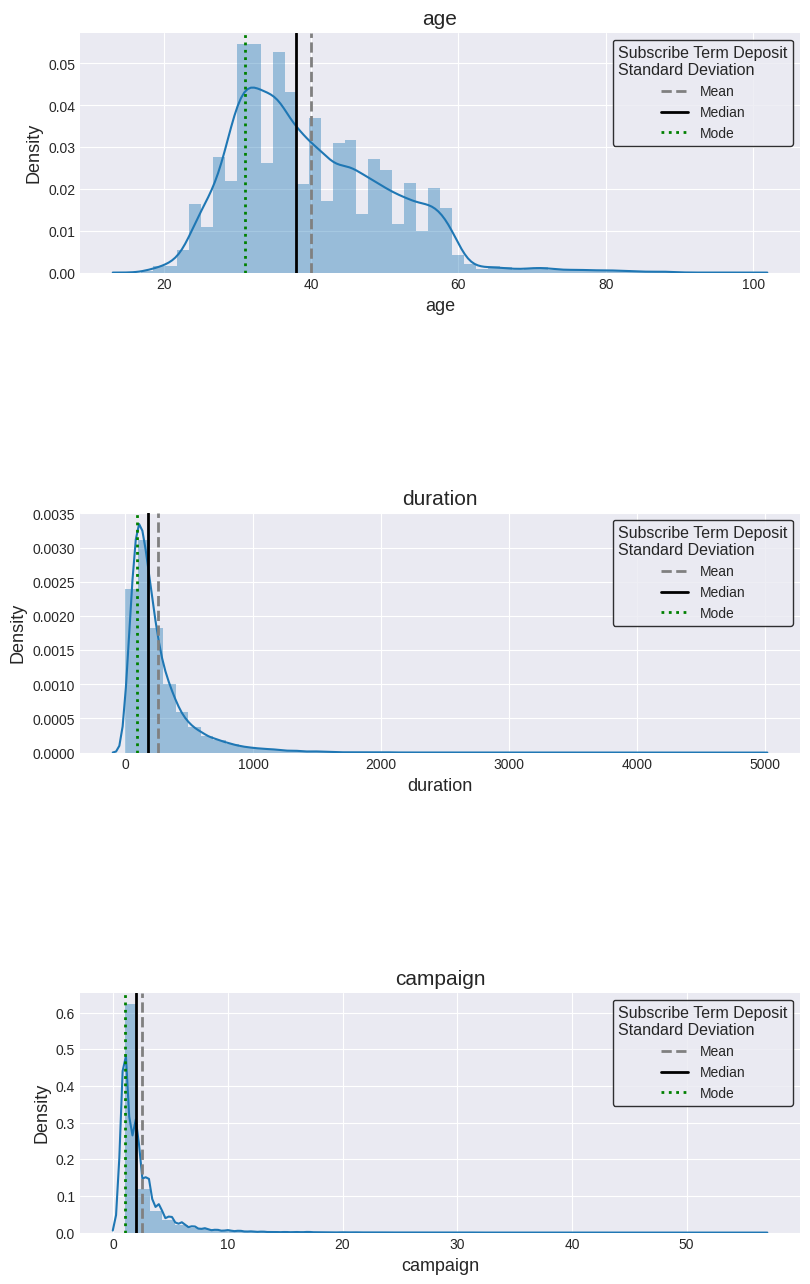

In [29]:
# Ploting Histogram for Each Numerical Variable
plt.style.use("seaborn-darkgrid")

def univariate_numerical(data, num_var):
  """
  Plots histograms for each numerical variable in a pandas DataFrame
  and saves them all in one PNG file (3 subplots per image).

  Args:
      data (pandas.DataFrame): The data to analyze.
      num_var (list): A list of numerical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Numerical_Data.png".
      figsize (tuple, optional): The figure size for the entire image (containing 3 subplots). Defaults to (12, 6).
  """

  # Create a single figure with subplots (3 rows for 3 variables)
  fig, axes = plt.subplots(nrows=3, figsize=(9, 15))  # Adjust rows for the number of variables

  # Iterate through numerical variables and create subplots
  for i, column in enumerate(num_var):
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()
    std = data[column].std()

    sns.distplot(data[column], kde=True, color="#1F77B4", ax=axes[i])
    axes[i].axvline(average, color='grey', linestyle='dashed', linewidth=2, label='Mean')
    axes[i].axvline(median, color='black', linestyle='solid', linewidth=2, label='Median')
    axes[i].axvline(mode[0], color='green', linestyle='dotted', linewidth=2, label='Mode')
    axes[i].set_xlabel(column, fontsize=13)
    axes[i].set_ylabel("Density", fontsize=13)
    axes[i].set_title(column, fontsize=15)

    # Adjust layout for each subplot
    axes[i].legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit\nStandard Deviation', title_fontsize=11.5)

  # Print descriptive statistics (optional)
  for column in num_var:
    average = data[column].mean()
    std = data[column].std()
    median = data[column].median()
    mode = int(data[column].mode())
    print('Statistic summary of {}'.format(column))
    print('Average:', "%.2f" % average)
    print('Standard deviation:', "%.2f" % std)
    print('Median:', "%.2f" % median)
    print('Mode:', mode)
    print('------------------------------')  # Separator between variables

  # Tight layout for better spacing
  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image (containing all 3 subplots)
  plt.savefig("Univariate Analysis Numerical Data.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
num_var = ["age", "duration", "campaign"]
univariate_numerical(data, num_var)

#### Kesimpulan Analisis Univariate pada Data Numerikal

* Distribusi Fitur yang Miring (Skewed):

> Seperti yang terlihat dari histogram, fitur-fitur usia (age), durasi (duration, seconds), dan kampanye (campaign) memiliki distribusi yang miring (skewed) karena adanya outlier, seperti yang terlihat pada distplot (distribution plot) untuk fitur-fitur tersebut.

* Kontak Sebelumnya (pdays):

> Berdasarkan plot untuk fitur pdays, dapat disimpulkan bahwa mayoritas nasabah telah dihubungi untuk pertama kalinya. Hal ini disebabkan oleh nilai 999 pada fitur pdays, yang menandakan bahwa nasabah tersebut sebelumnya belum pernah dihubungi.

Analisis ini dapat membantu bank dalam menyadari adanya potensi outlier dan kemungkinan bias yang mungkin mempengaruhi analisis lebih lanjut atau pengembangan model prediksi. Selain itu, pengetahuan tentang seberapa sering nasabah dihubungi sebelumnya (pdays) dapat membantu bank dalam mengoptimalkan strategi komunikasi dengan pelanggan untuk mendapatkan hasil yang lebih efektif dalam kampanye pemasaran selanjutnya.

### Bivariate Analysis: for Categorical Data

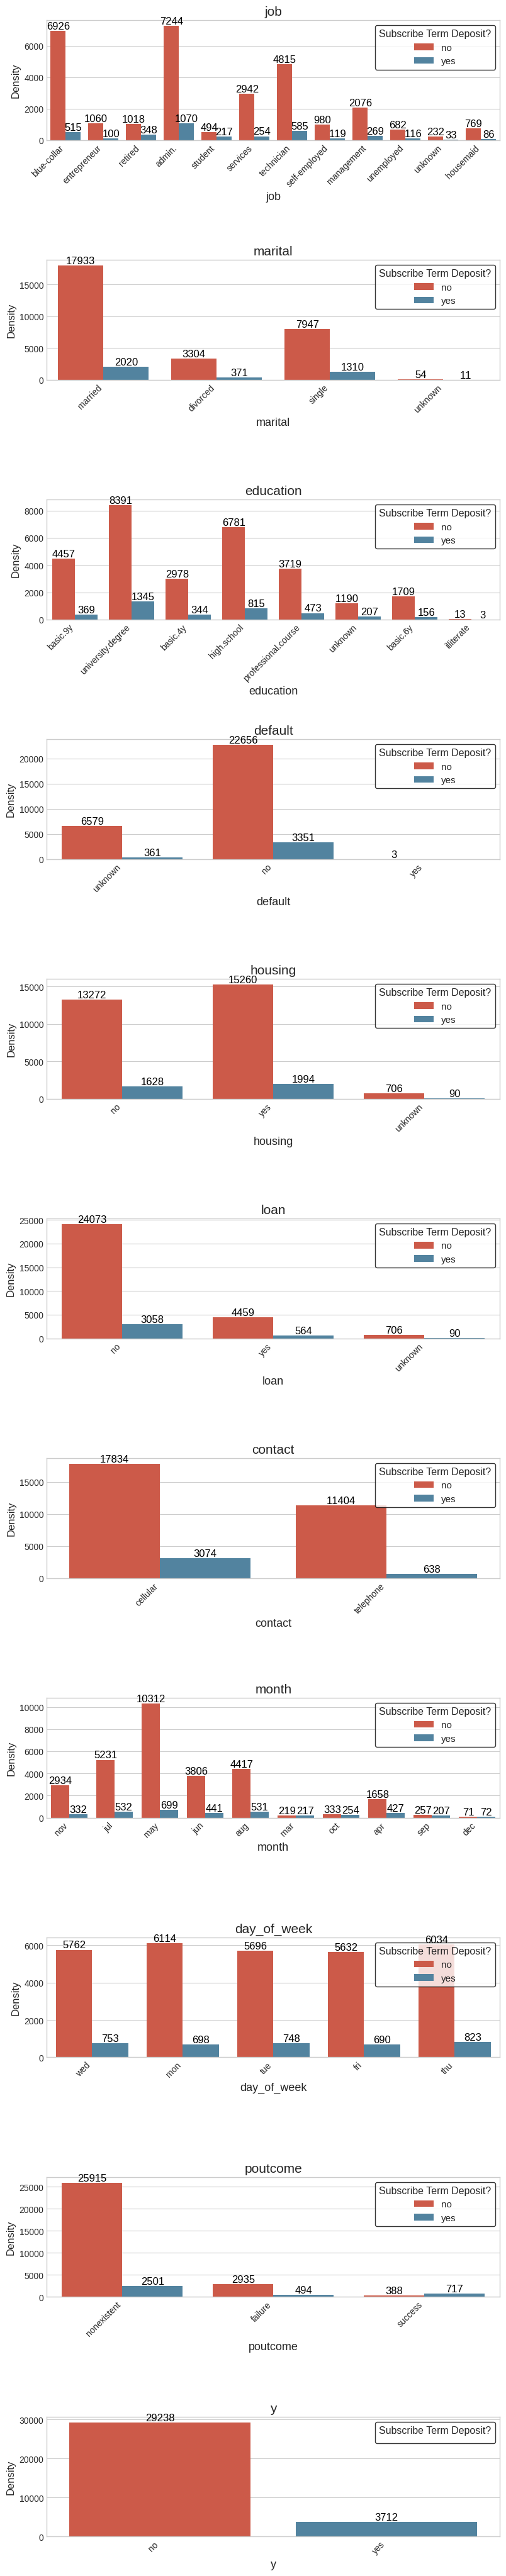

In [30]:
# Ploting Histogram for Each Categorical Variable
plt.style.use("seaborn-whitegrid")

def bivariate_categorical(data, cat_var):
  """
  Plots histograms for each categorical variable in a pandas DataFrame
  and saves them all in one PNG file (3 subplots per image).

  Args:
      data (pandas.DataFrame): The data to analyze.
      cat_var (list): A list of categorical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Categorical_Hist.png".
      figsize (tuple, optional): The figure size for the entire image (containing 3 subplots). Defaults to (12, 6).
  """

  # Create a single figure with subplots (3 rows for 3 variables)
  fig, axes = plt.subplots(nrows=len(cat_var), figsize=(9, 50))  # Adjust rows for number of variables

  # Iterate through categorical variables and create subplots
  for i, column in enumerate(cat_var):
    sns.countplot(x=data[column], hue=data["y"], palette=['#E24A33', '#4586AC'], ax=axes[i])

    # Get unique categories (ticks) for rotation (handles empty or single-value cases)
    categories = data[column].unique()
    if len(categories) > 1:  # Rotate only if there are multiple categories
      axes[i].set_xticks(range(len(categories)))  # Set tick positions explicitly
      axes[i].set_xticklabels(categories, rotation=45, ha='right')  # Set labels with alignment

    for label in axes[i].containers:
      axes[i].bar_label(label, color='black', label_type='edge', fontsize=12)

    axes[i].set_xlabel(column, fontsize=13)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].set_title(column, fontsize=15)

    # Adjust layout for each subplot (optional)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, labels, loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=11.5, fontsize=11)

  # Tight layout for better spacing
  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image (containing all subplots)
  plt.savefig("Bivariate Analysis Categorical Data.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
bivariate_categorical(data, cat_var)

#### Kesimpulan Analisis Bivariate pada Data Kategorikal

1. Profesi Administratif Mendominasi:

> Mayoritas nasabah yang berlangganan deposito berjangka memiliki pekerjaan administratif. Profesi ini merupakan yang paling banyak diantara nasabah yang berlangganan.

2. Status Pernikahan Terbanyak Adalah Menikah:

> Mayoritas nasabah yang berlangganan deposito berjangka adalah yang sudah menikah.

3. Pendidikan Terakhir Terbanyak Adalah Sarjana:

> Banyak dari nasabah yang berlangganan deposito berjangka memiliki latar belakang pendidikan universitas (sarjana).

4. Tidak Memiliki Kredit Bermasalah:

> Mayoritas nasabah yang berlangganan deposito berjangka tidak memiliki kredit bermasalah.

5. Prioritas Loan Perumahan Tidak Signifikan:

> Tidak terlihat perbedaan signifikan antara nasabah yang berlangganan deposito berjangka yang memiliki dan tidak memiliki pinjaman perumahan. Jadi, pemeriksaan pinjaman perumahan mungkin tidak menjadi prioritas dalam kampanye pemasaran.

6. Penggunaan Ponsel Sebagai Mode Kontak Utama:

> Ponsel merupakan mode kontak yang paling disukai untuk menghubungi nasabah. Penggunaan ponsel sebagai alat komunikasi dapat memberikan hasil yang lebih baik dalam upaya pemasaran.

### Bivariate Analysis: for Numerical Data

Statistic summary of subscribe a term deposit (Age)
Average :  40.85
Standard deviation :  13.76
Median :  37.00
Mode :  31
Statistic summary of NOT subscribe a term deposit (Age)
Average :  39.91
Standard deviation :  9.89
Median :  38.00
Mode :  31
Statistic summary of subscribe a term deposit (Duration)
Average :  549.40
Standard deviation :  397.49
Median :  448.00
Mode :  187
Statistic summary of NOT subscribe a term deposit (Duration)
Average :  221.15
Standard deviation :  208.30
Median :  164.00
Mode :  90
Statistic summary of subscribe a term deposit (Campaign)
Average :  2.05
Standard deviation :  1.66
Median :  2.00
Mode :  1
Statistic summary of NOT subscribe a term deposit (Campaign)
Average :  2.62
Standard deviation :  2.86
Median :  2.00
Mode :  1


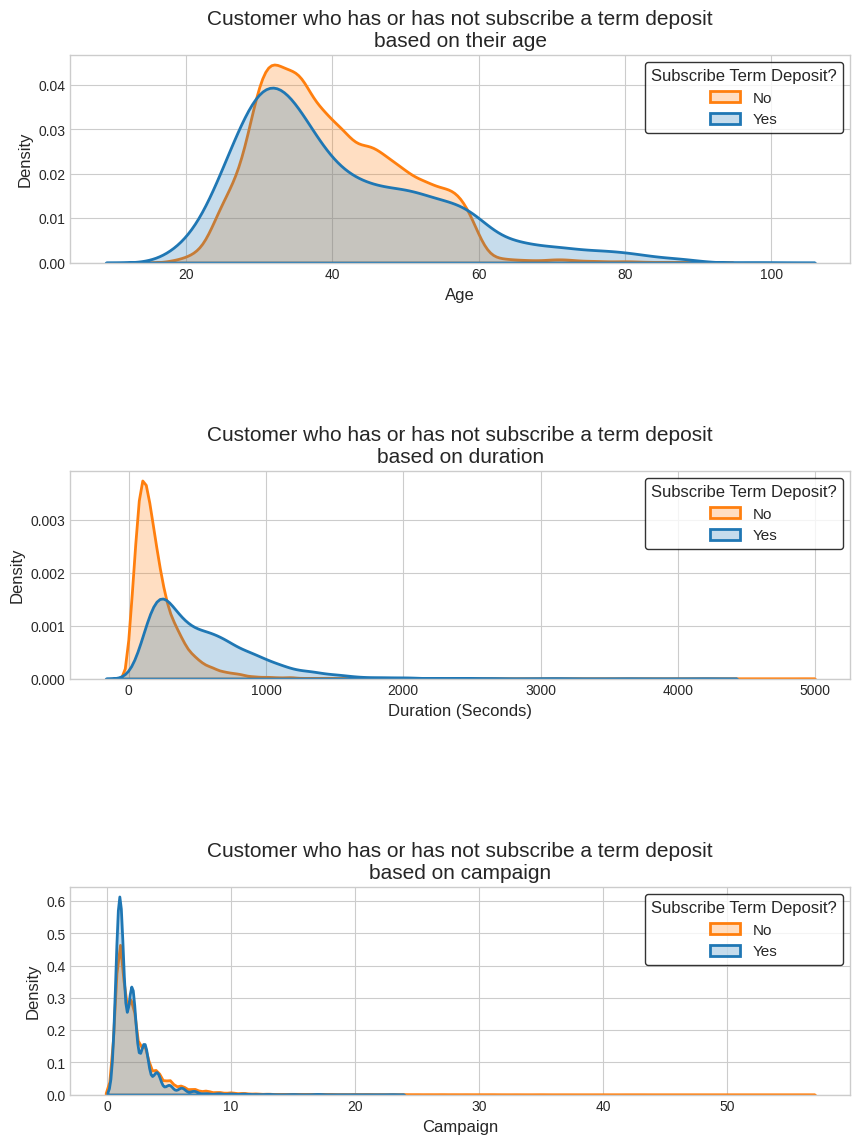

In [31]:
# Membandingkan yang Sudah Berlangganan atau Tidak Berdasarkan 'Usia', 'Berapa Kali Kampanye', dan 'Durasi Kampanye'
age_yes = data['age'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]
campaign_yes = data['campaign'][data['y'] == "yes"]
campaign_no = data['campaign'][data['y'] == "no"]
duration_yes = data['duration'][data['y'] == "yes"]
duration_no = data['duration'][data['y'] == "no"]

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(9.75, 13))

# Subplot #1 Age 'Yes' vs 'No'
plt.subplot(3, 1, 1)
average_age_yes = age_yes.mean()
median_age_yes = age_yes.median()
mode_age_yes = age_yes.mode()
std_age_yes = age_yes.std()
average_age_no = age_no.mean()
median_age_no = age_no.median()
mode_age_no = age_no.mode()
std_age_no = age_no.std()

sns.distplot(age_no, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#FF7F0E", label='No')
sns.distplot(age_yes, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#1F77B4", label='Yes')
# plt.axvline(average_age_yes, color='grey', linestyle='dashed', linewidth=2, label='Mean Yes')
# plt.axvline(median_age_yes, color='black', linestyle='solid', linewidth=2, label='Median Yes')
# plt.axvline(mode_age_yes[0], color='green', linestyle='solid', linewidth=2, label='Mode Yes')
# plt.axvline(average_age_no, color='brown', linestyle='dotted', linewidth=2, label='Mean No')
# plt.axvline(median_age_no, color='red', linestyle='solid', linewidth=2, label='Median No')
# plt.axvline(mode_age_no[0], color='purple', linestyle='dashed', linewidth=2, label='Mode No')
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Customer who has or has not subscribe a term deposit\nbased on their age", fontsize=15)

print('Statistic summary of subscribe a term deposit (Age)')
print('Average : ', "%.2f" %average_age_yes)
print('Standard deviation : ', "%.2f" %std_age_yes)
print('Median : ', "%.2f" %median_age_yes)
print('Mode : ', int(mode_age_yes))
print('Statistic summary of NOT subscribe a term deposit (Age)')
print('Average : ', "%.2f" %average_age_no)
print('Standard deviation : ', "%.2f" %std_age_no)
print('Median : ', "%.2f" %median_age_no)
print('Mode : ', int(mode_age_no))

# Subplot #2 Duration 'Yes' vs 'No'
plt.subplot(3, 1, 2)
average_duration_yes = duration_yes.mean()
median_duration_yes = duration_yes.median()
mode_duration_yes = duration_yes.mode()
std_duration_yes = duration_yes.std()
average_duration_no = duration_no.mean()
median_duration_no = duration_no.median()
mode_duration_no = duration_no.mode()
std_duration_no = duration_no.std()

sns.distplot(duration_no, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#FF7F0E", label='No')
sns.distplot(duration_yes, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#1F77B4", label='Yes')
# plt.axvline(average_duration_yes, color='grey', linestyle='dashed', linewidth=1.5, label='Mean Yes')
# plt.axvline(median_duration_yes, color='black', linestyle='solid', linewidth=1.5, label='Median Yes')
# plt.axvline(mode_duration_yes[0], color='green', linestyle='dashed', linewidth=1.5, label='Mode Yes')
# plt.axvline(average_duration_no, color='brown', linestyle='dashed', linewidth=1.5, label='Mean No')
# plt.axvline(median_duration_no, color='red', linestyle='solid', linewidth=1.5, label='Median No')
# plt.axvline(mode_duration_no[0], color='purple', linestyle='dashed', linewidth=1.5, label='Mode No')
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Duration (Seconds)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Customer who has or has not subscribe a term deposit\nbased on duration", fontsize=15)

print('Statistic summary of subscribe a term deposit (Duration)')
print('Average : ', "%.2f" %average_duration_yes)
print('Standard deviation : ', "%.2f" %std_duration_yes)
print('Median : ', "%.2f" %median_duration_yes)
print('Mode : ', int(mode_duration_yes))
print('Statistic summary of NOT subscribe a term deposit (Duration)')
print('Average : ', "%.2f" %average_duration_no)
print('Standard deviation : ', "%.2f" %std_duration_no)
print('Median : ', "%.2f" %median_duration_no)
print('Mode : ', int(mode_duration_no))

# Subplot #3 Campaign 'Yes' vs 'No'
plt.subplot(3, 1, 3)
average_campaign_yes = campaign_yes.mean()
median_campaign_yes = campaign_yes.median()
mode_campaign_yes = campaign_yes.mode()
std_campaign_yes = campaign_yes.std()
average_campaign_no = campaign_no.mean()
median_campaign_no = campaign_no.median()
mode_campaign_no = campaign_no.mode()
std_campaign_no = campaign_no.std()

sns.distplot(campaign_no, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#FF7F0E", label='No')
sns.distplot(campaign_yes, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2}, color="#1F77B4", label='Yes')
# plt.axvline(average_campaign_yes, color='grey', linestyle='solid', linewidth=1.5, label='Mean Yes')
# plt.axvline(median_campaign_yes, color='black', linestyle='dashed', linewidth=1.5, label='Median Yes')
# plt.axvline(mode_campaign_yes[0], color='green', linestyle='solid', linewidth=1.5, label='Mode Yes')
# plt.axvline(average_campaign_no, color='brown', linestyle='dotted', linewidth=1.5, label='Mean No')
# plt.axvline(median_campaign_no, color='red', linestyle='dotted', linewidth=1.5, label='Median No')
# plt.axvline(mode_campaign_no[0], color='purple', linestyle='dashed', linewidth=1.5, label='Mode No')
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Campaign", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Customer who has or has not subscribe a term deposit\nbased on campaign", fontsize=15)

# Print Descriptive Statistics
print('Statistic summary of subscribe a term deposit (Campaign)')
print('Average : ', "%.2f" %average_campaign_yes)
print('Standard deviation : ', "%.2f" %std_campaign_yes)
print('Median : ', "%.2f" %median_campaign_yes)
print('Mode : ', int(mode_campaign_yes))
print('Statistic summary of NOT subscribe a term deposit (Campaign)')
print('Average : ', "%.2f" %average_campaign_no)
print('Standard deviation : ', "%.2f" %std_campaign_no)
print('Median : ', "%.2f" %median_campaign_no)
print('Mode : ', int(mode_campaign_no))

plt.tight_layout()

# Adjust spacing between subplots for better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Bivariate Analysis Numerical Data.png")

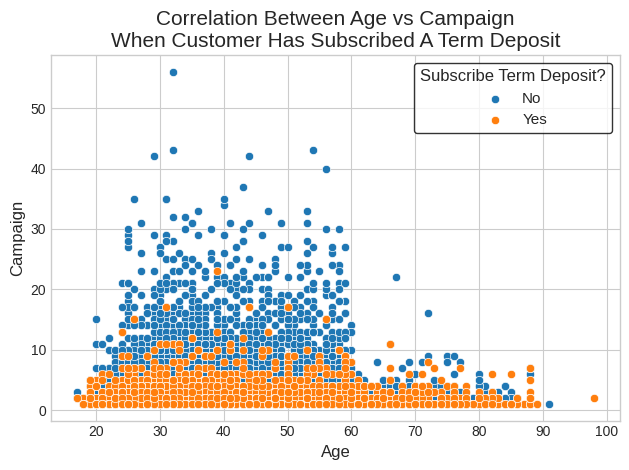

In [32]:
# Correlation Between Age vs Campaign When Customer Has Subscribed A Term Deposit
age_yes = data['age'][data['y'] == "yes"]
campaign_yes = data['campaign'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]
campaign_no = data['campaign'][data['y'] == "no"]

plt.style.use("seaborn-whitegrid")
sns.scatterplot(x=age_no, y=campaign_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=age_yes, y=campaign_yes, data=data, palette='#FF7F0E', label='Yes')

plt.xlabel("Age", fontsize=12)
plt.ylabel("Campaign", fontsize=12)
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.title('Correlation Between Age vs Campaign\nWhen Customer Has Subscribed A Term Deposit', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Correlation Between Age vs Campaign When Customer Has Subscribed A Term Deposit.png")

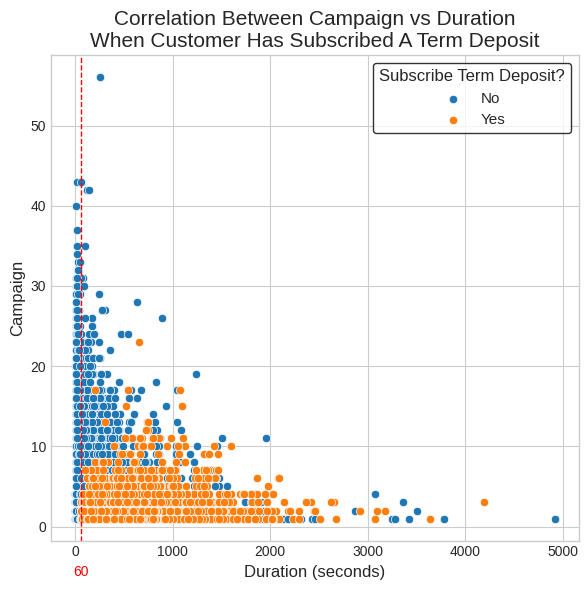

In [33]:
# Correlation Between Campaign vs Duration When Customer Has Subscribed A Term Deposit
duration_yes = data['duration'][data['y'] == "yes"]
campaign_yes = data['campaign'][data['y'] == "yes"]
duration_no = data['duration'][data['y'] == "no"]
campaign_no = data['campaign'][data['y'] == "no"]

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(x=duration_no, y=campaign_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=duration_yes, y=campaign_yes, data=data, palette='#FF7F0E', label='Yes')

# Mengatur letak garis grid pada sumbu y dengan kelipatan 300 detik dan batas bawah 60 detik
# plt.yticks(np.arange(0, max(data['duration']) + 1, 300))

# Tambahkan garis untuk batas bawah 60 pada sumbu y
# plt.axhline(y=60, color='red', linestyle='dashed', linewidth=1)
# Tambahkan label pada garis batas bawah 60 pada sumbu y
# plt.text(plt.gca().get_xlim()[0] - 2, 60, '60', ha='right', va='center', color='red')

# Tambahkan garis untuk batas bawah 60 pada sumbu x
plt.axvline(x=60, color='red', linestyle='dashed', linewidth=1)
# Tambahkan label pada garis batas bawah 60 pada sumbu x
plt.text(60, plt.gca().get_ylim()[0] - 3, '60', ha='center', va='top', color='red')
# Invert the y-axis
# plt.gca().invert_yaxis()

plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Campaign", fontsize=12)
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Duration (seconds)")
plt.title('Correlation Between Campaign vs Duration\nWhen Customer Has Subscribed A Term Deposit', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Correlation Between Campaign vs Duration When Customer Has Subscribed A Term Deposit.png")

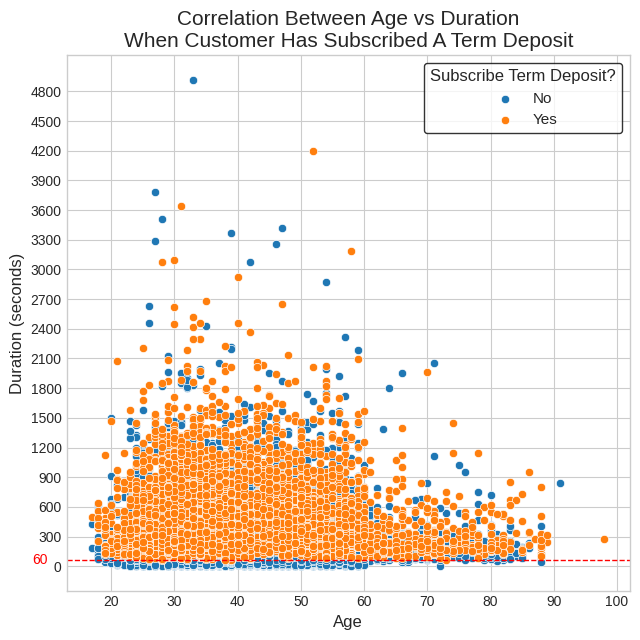

In [34]:
# Correlation Between Age vs Duration When Customer Has Subscribed A Term Deposit
age_yes = data['age'][data['y'] == "yes"]
duration_yes = data['duration'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]
duration_no = data['duration'][data['y'] == "no"]

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(6.5, 6.5))
sns.scatterplot(x=age_no, y=duration_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=age_yes, y=duration_yes, data=data, palette='#FF7F0E', label='Yes')

# Mengatur letak garis grid pada sumbu y dengan kelipatan 300 detik dan batas bawah 60 detik
plt.yticks(np.arange(0, max(data['duration']) + 1, 300))
# Menambahkan garis untuk batas bawah 60 detik
plt.axhline(y=60, color='red', linestyle='dashed', linewidth=1)
# Menambahkan label pada garis batas bawah 60 detik
plt.text(plt.gca().get_xlim()[0] - 3, 60, '60', ha='right', va='center', color='red')
# Invert the y-axis
# plt.gca().invert_yaxis()

plt.xlabel("Age", fontsize=12)
plt.ylabel("Duration (seconds)", fontsize=12)
plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.ylabel("Duration (seconds)")
plt.title('Correlation Between Age vs Duration\nWhen Customer Has Subscribed A Term Deposit', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Correlation Between Age vs Duration When Customer Has Subscribed A Term Deposit.png")

#### Kesimpulan Analisis Bivariate pada Data Numerikal

* Korelasi Usia dengan Frekuensi Kampanye/Penawaran Promosi

> Seperti yang terlihat dari histogram tersebut, klien yang sudah berlangganan deposito jangka panjang sebagian besar kurang dari 11 kali kampanye/penawaran promosi di berbagai usia

* Korelasi Jumlah Durasi dengan Frekuensi Kampanye/Penawaran Promosi

> Seperti yang terlihat dari histogram tersebut, klien yang sudah berlangganan deposito jangka panjang ketika ditawarkan produk tersebut melalui media komunikasi dilakukan selama lebih dari 60 detik di setiap frekuensi kampanye/penawaran promosi

* Korelasi Usia dengan Jumlah Durasi Kegiatan Kampanye/Penawaran Promosi

> Seperti yang terlihat dari histogram tersebut, klien yang sudah berlangganan deposito jangka panjang ketika ditawarkan produk tersebut melalui media komunikasi dilakukan selama lebih dari 60 detik di berbagai usia

## Further Exploration (For Make Sub-Plot)

### Melihat Segmen 'Job' Terbanyak

In [35]:
data["job"].value_counts()

job
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: count, dtype: int64

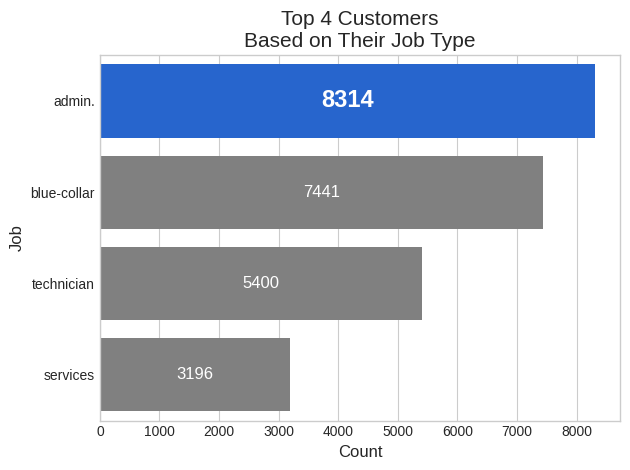

In [36]:
# Menguji Visualisasi Data Segmen 'Job' Terbanyak
# Top 4 Customer Based on Their Job Type
job = data.loc[data.job.isin(['admin.', 'blue-collar', 'technician', 'services'])]
ax = sns.countplot(y='job', data=job, order=['admin.', 'blue-collar', 'technician', 'services'], palette=['#0B5EE9', 'Grey', 'Grey', 'Grey'])

for i, label in enumerate(ax.containers):
    if i == 0:  # Check if it's the first label
        ax.bar_label(label, color='white', label_type='center', fontsize=17, fontweight="bold")
    else:
        ax.bar_label(label, color='white', label_type='center', fontsize=12)

plt.xlabel("Count", fontsize=12)
plt.ylabel("Job", fontsize=12)
plt.title('Top 4 Customers\nBased on Their Job Type', fontsize=15)
plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Top 4 Customer Based on Their Job Type.png")

### Melihat Segmen 'Job' Terbanyak dengan Segmen 'Y' (Has The Client Subscribed A Long-Term Deposit?)

In [37]:
data.groupby("y")["job"].value_counts()

y    job          
no   admin.           7244
     blue-collar      6926
     technician       4815
     services         2942
     management       2076
     entrepreneur     1060
     retired          1018
     self-employed     980
     housemaid         769
     unemployed        682
     student           494
     unknown           232
yes  admin.           1070
     technician        585
     blue-collar       515
     retired           348
     management        269
     services          254
     student           217
     self-employed     119
     unemployed        116
     entrepreneur      100
     housemaid          86
     unknown            33
Name: count, dtype: int64

### Melihat Segmen 'Education' Terbanyak

In [38]:
data["education"].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [39]:
data['education'].value_counts()

education
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: count, dtype: int64

In [40]:
data['education'].value_counts(normalize=True)

education
university.degree      0.295478
high.school            0.230531
basic.9y               0.146464
professional.course    0.127223
basic.4y               0.100819
basic.6y               0.056601
unknown                0.042398
illiterate             0.000486
Name: proportion, dtype: float64

In [41]:
data['education'].value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object', name='education')

### Melihat Perbandingan Segmen 'Education' dengan Segmen 'Y' (Has The Client Subscribed A Long-Term Deposit?)

In [42]:
data.groupby("y")["education"].value_counts()

y    education          
no   university.degree      8391
     high.school            6781
     basic.9y               4457
     professional.course    3719
     basic.4y               2978
     basic.6y               1709
     unknown                1190
     illiterate               13
yes  university.degree      1345
     high.school             815
     professional.course     473
     basic.9y                369
     basic.4y                344
     unknown                 207
     basic.6y                156
     illiterate                3
Name: count, dtype: int64

In [43]:
data.groupby("y")["education"].value_counts(normalize=True)

y    education          
no   university.degree      0.286990
     high.school            0.231924
     basic.9y               0.152439
     professional.course    0.127197
     basic.4y               0.101854
     basic.6y               0.058451
     unknown                0.040700
     illiterate             0.000445
yes  university.degree      0.362338
     high.school            0.219558
     professional.course    0.127425
     basic.9y               0.099407
     basic.4y               0.092672
     unknown                0.055765
     basic.6y               0.042026
     illiterate             0.000808
Name: proportion, dtype: float64

In [44]:
x_var, y_var = "y", "education"
data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no         0.101854  0.058451  0.152439     0.231924    0.000445   
yes        0.092672  0.042026  0.099407     0.219558    0.000808   

education  professional.course  university.degree   unknown  
y                                                            
no                    0.127197           0.286990  0.040700  
yes                   0.127425           0.362338  0.055765

In [45]:
x_var, y_var = "y", "education"
test = data.groupby(x_var)[y_var]
test.value_counts(normalize=True).unstack(sort=False)*100

education  university.degree  high.school   basic.9y  professional.course  \
y                                                                           
no                 28.698953    23.192421  15.243861            12.719748   
yes                36.233836    21.955819  12.742457             9.940733   

education   basic.4y  basic.6y   unknown  illiterate  
y                                                     
no         10.185375  5.845133  4.070046    0.044463  
yes         9.267241  5.576509  4.202586    0.080819

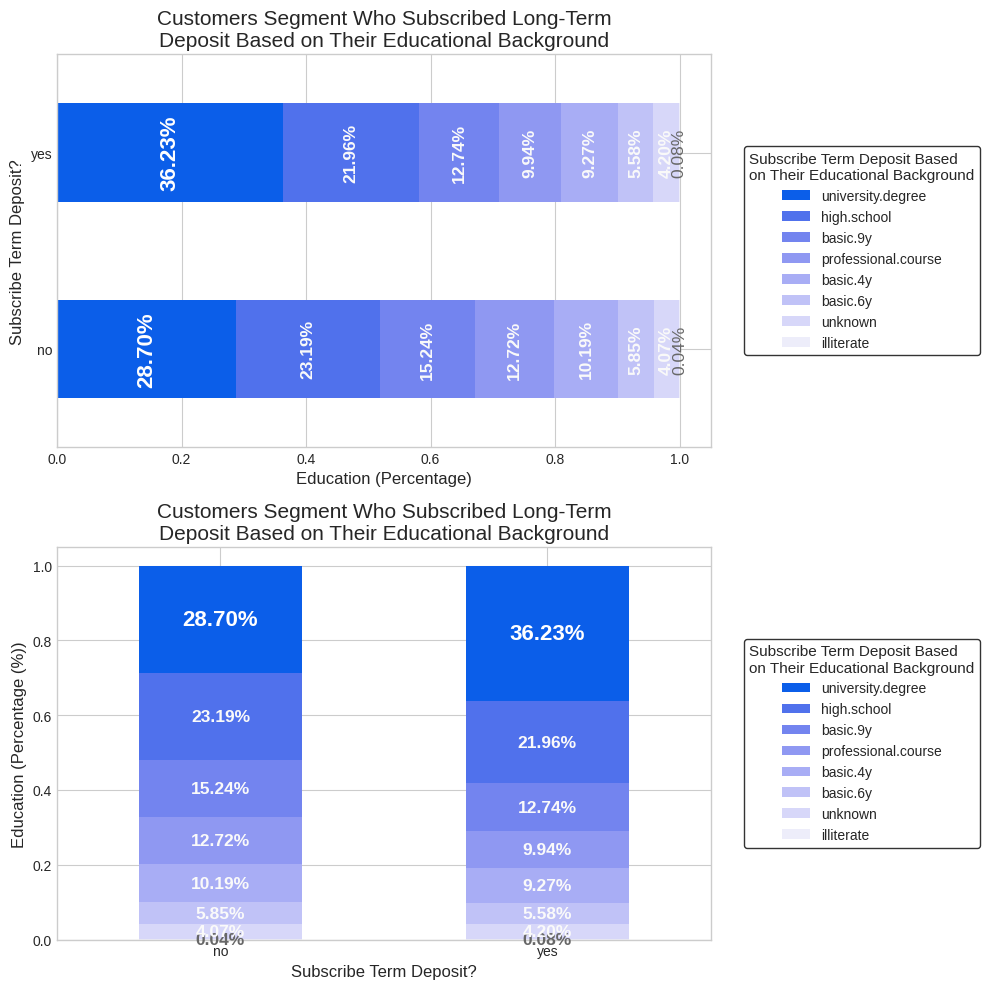

In [46]:
# Menguji Visualisasi Data Perbandingan Segmen 'Education' dengan Segmen 'Y' (Has The Client Subscribed A Long-Term Deposit?)
# Customers Segment Who Subscribed Long-Term Deposit Based on Their Educational Background
# Customers Segment Based on Their Educational Background
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10, 10))

# Subplot #1
# 100% Stacked Horizontal Bar Chart
ax1 = plt.subplot(2, 1, 1)

x_var, y_var = "y", "education"
df_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(sort=False)
colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']

# Create the plot
df_grouped.plot.barh(ax=ax1, stacked=True, mark_right=True, color=colors)
ax1.legend(loc="center left", edgecolor='black', frameon=True,
           title='Subscribe Term Deposit Based\non Their Educational Background',
           ncols=1, bbox_to_anchor=(1.04, 0.5), title_fontsize=11, fontsize=10)

# ax1.legend(loc="best", edgecolor='black', frameon=True,
#            title='Subscribe Term Deposit Based on Their Educational Background',
#            ncols=3, bbox_to_anchor=(1, -0.2), fontsize=9.5)

for i, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    other_value = 0
    for j, element in enumerate(row):
        if element == element and element > 0.00001:
            if j < 7:
                if cumulative == 0:
                    text_color = 'white'
                    fontweight = 'extra bold'
                    fontsize = 16
                else:
                    text_color = '#FAFAFA'
                    fontweight = 'bold'
                    fontsize = 12.5
                ax1.text(cumulative + element / 2, i, f"{element*100:.2f}%", va="center",
                         ha="center", color=text_color, fontsize=fontsize, fontweight=fontweight,
                         rotation=90, rotation_mode="anchor")
            else:
                other_value += element
        cumulative += element

    # Add 'Other' label if there's a value
    if other_value > 0:
        text_color = '#676767'
        fontweight = 'normal'
        fontsize = 12.5
        ax1.text(cumulative - other_value / 2, i, f"{other_value*100:.2f}%",
                 va="center", ha="center", color=text_color, fontsize=fontsize,
                 fontweight=fontweight, rotation=90)

plt.xlabel("Education (Percentage)", fontsize=12)
plt.ylabel("Subscribe Term Deposit?", fontsize=12)
ax1.set_title('Customers Segment Who Subscribed Long-Term\nDeposit Based on Their Educational Background',
              fontsize=15)
plt.tight_layout()

# Subplot #2
# 100% Stacked Vertical Bar Chart
ax2 = plt.subplot(2, 1, 2)

x_var, y_var = "y", "education"
df_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True, ascending=True).unstack(sort=False)
colors = ['#EDEDFA', '#D7D7F9', '#C0C2F7', '#A8ADF5', '#8F98F2', '#7384EF', '#5071EC', '#0B5EE9']

# Create the plot
df_grouped.plot.bar(ax=ax2, stacked=True, color=colors)
ax2.legend(loc="center left", edgecolor='black', frameon=True, reverse=True,
           title='Subscribe Term Deposit Based\non Their Educational Background',
           ncols=1, bbox_to_anchor=(1.04, 0.5), title_fontsize=11, fontsize=10)

for i, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    other_value = 0
    for j, element in enumerate(row):
        if element == element and element > 0.00001:
            if j < 7:
                if cumulative == 0:
                    text_color = '#676767'
                    fontweight = 'normal'
                    fontsize = 12.5
                else:
                    text_color = '#FAFAFA'
                    fontweight = 'bold'
                    fontsize = 12.5
                ax2.text(i, cumulative + element / 2, f"{element*100:.2f}%",
                     va="center", ha="center", color=text_color, fontsize=12.5,
                     fontweight="bold")
            else:
                other_value += element
        cumulative += element

    # Add 'Other' label if there's a value
    if other_value > 0:
        text_color = 'white'
        fontweight = 'extra bold'
        fontsize = 16
        ax2.text(i, cumulative - other_value / 2, f"{other_value*100:.2f}%",
                 va="center", ha="center", color=text_color, fontsize=fontsize,
                 fontweight=fontweight)

plt.xlabel("Subscribe Term Deposit?", fontsize=12)
plt.ylabel("Education (Percentage (%))", fontsize=12)
plt.xticks(rotation=0)
ax2.set_title('Customers Segment Who Subscribed Long-Term\nDeposit Based on Their Educational Background',
              fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Customers Segment Based on Their Educational Background.png")

### Melihat Segmen 'Month' (Customer yang Terakhir dihubungi pada Bulan Tertentu, Kecuali Januari dan Februari) Terbanyak

In [47]:
data["month"].value_counts()

month
may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: count, dtype: int64

In [48]:
data["month"].unique()

array(['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep',
       'dec'], dtype=object)

## Sub-Plot (Further Exploration)

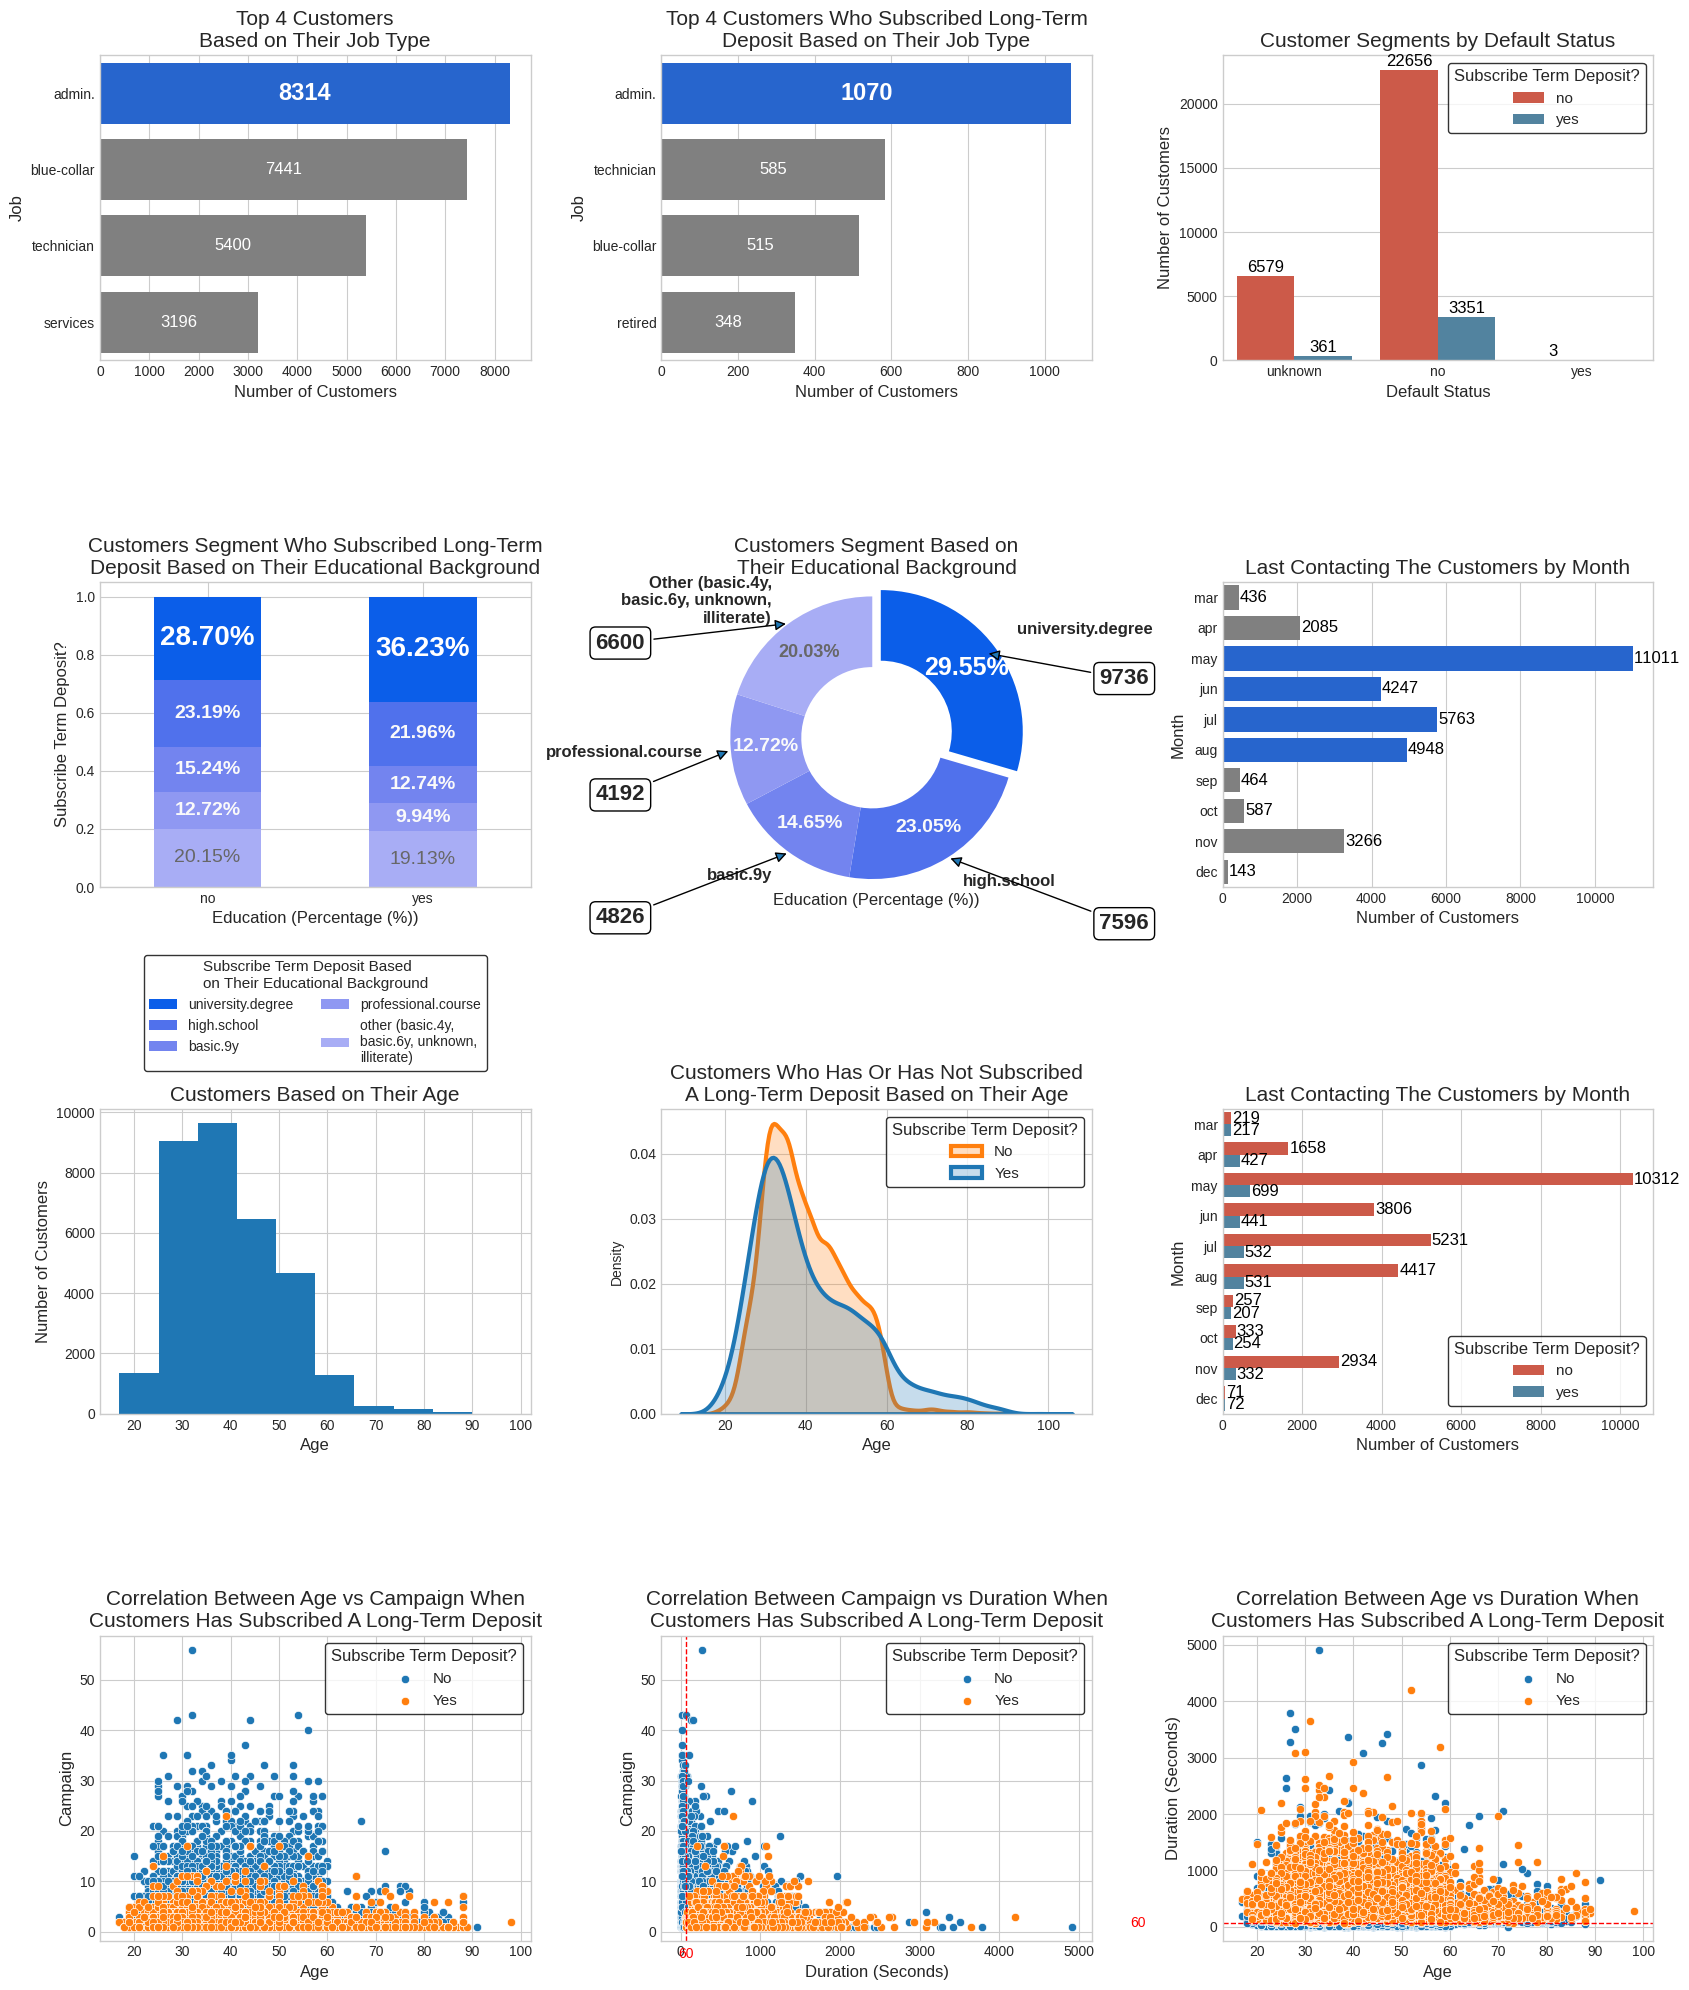

In [49]:
# Sub Plot
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(17, 20))

# Subplot #1
# Top 4 Customers Based on Their Job Type
plt.subplot(4, 3, 1)
job = data.loc[data.job.isin(['admin.', 'blue-collar', 'technician', 'services'])]

ax1 = sns.countplot(y='job', data=job, order=['admin.', 'blue-collar', 'technician', 'services'], palette=['#0B5EE9', 'Grey', 'Grey', 'Grey'])
for i, label in enumerate(ax1.containers):
    if i == 0:  # Check if it's the first label
        ax1.bar_label(label, color='white', label_type='center', fontsize=17, fontweight="bold")
    else:
        ax1.bar_label(label, color='white', label_type='center', fontsize=12)

plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Job", fontsize=12)
plt.title('Top 4 Customers\nBased on Their Job Type', fontsize=15)
plt.tight_layout()

# Subplot #2
# Top 4 Customers Who Subscribed Long-Term Deposit Based on Their Job Type
plt.subplot(4, 3, 2)
job = data.loc[data.job.isin(['admin.', 'technician', 'blue-collar', 'retired'])]
job_yes = job[data['y'] == "yes"]

ax2 = sns.countplot(y='job', data=job_yes, order=['admin.', 'technician', 'blue-collar', 'retired'], palette=['#0B5EE9', 'Grey', 'Grey', 'Grey'])
for i, label in enumerate(ax2.containers):
    if i == 0:  # Check if it's the first label
        ax2.bar_label(label, color='white', label_type='center', fontsize=17, fontweight="bold")
    else:
        ax2.bar_label(label, color='white', label_type='center', fontsize=12)

plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Job", fontsize=12)
plt.title('Top 4 Customers Who Subscribed Long-Term\nDeposit Based on Their Job Type', fontsize=15)
plt.tight_layout()

# Subplot #3
# Customer Segments by Default Status
plt.subplot(4, 3, 3)

ax3 = sns.countplot(x=data['default'], hue=data["y"], palette=['#E24A33', '#4586AC'])
for label in ax3.containers:
  ax3.bar_label(label, color='black', label_type='edge', fontsize=12, padding=0.7)

plt.xticks(rotation=0)
plt.xlabel("Default Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(frameon=True, edgecolor='black', loc='upper right', title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.title('Customer Segments by Default Status', fontsize=15)
plt.tight_layout()

# Subplot #4
# Customers Segment Who Subscribed Long-Term Deposit Based on Their Educational Background
ax4 = plt.subplot(4, 3, 4)  # Create explicit axes for Subplot #4

x_var, y_var = "y", "education"
df_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True, ascending=True).unstack(sort=False)
colors = ['#A8ADF5', '#8F98F2', '#7384EF', '#5071EC', '#0B5EE9']

# Menghitung jumlah untuk kategori "Other" dan menggabungkan
other_cols = df_grouped.columns[:4]  # Asumsikan 4 kolom terakhir adalah yang ingin digabungkan
df_grouped['other (basic.4y,\nbasic.6y, unknown,\nilliterate)'] = df_grouped[other_cols].sum(axis=1)
df_grouped = df_grouped.drop(other_cols, axis=1)

# Mengatur ulang indeks agar "Other" berada di indeks pertama
df_grouped_new = df_grouped[['other (basic.4y,\nbasic.6y, unknown,\nilliterate)'] + list(df_grouped.columns[:-1])]

# ['other (basic.4y,\nbasic.6y, unknown,\nilliterate)']

# Plot the new DataFrame
df_grouped_new.plot.bar(ax=ax4, stacked=True, color=colors)
ax4.legend(loc="upper center", edgecolor='black', frameon=True, reverse=True,
          title='Subscribe Term Deposit Based\non Their Educational Background',
          ncols=2, bbox_to_anchor=(0.5, -0.2), title_fontsize=11, fontsize=10)

for i, row in df_grouped_new.reset_index(drop=True).iterrows():
    cumulative = 0
    other_value = 0
    for j, element in enumerate(row):
        if element == element and element > 0.00001:
            if j < 4:
                if cumulative == 0:
                    text_color = '#676767'
                    fontweight = 'normal'
                    fontsize = 14
                else:
                    text_color = '#FAFAFA'
                    fontweight = 'bold'
                    fontsize = 14
                ax4.text(i, cumulative + element / 2, f"{element*100:.2f}%", va="center",
                         ha="center", color=text_color, fontsize=fontsize, fontweight=fontweight,
                         rotation=0, rotation_mode="anchor")
            else:
                other_value += element
        cumulative += element

    # Add 'Other' label if there's a value
    if other_value > 0:
        text_color = 'white'
        fontweight = 'extra bold'
        fontsize = 20
        ax4.text(i, cumulative - other_value / 2, f"{other_value*100:.2f}%",
                 va="center", ha="center", color=text_color, fontsize=fontsize,
                 fontweight=fontweight, rotation=0)

plt.xlabel("Education (Percentage (%))", fontsize=12)
plt.ylabel("Subscribe Term Deposit?", fontsize=12)
plt.xticks(rotation=0)
ax4.set_title('Customers Segment Who Subscribed Long-Term\nDeposit Based on Their Educational Background',
          fontsize=15)
plt.tight_layout()

# Subplot #5
# Customers Segment Based on Their Educational Background
plt.subplot(4, 3, 5)

colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']
explode = (0.075, 0, 0, 0, 0)
education_old = data['education'].value_counts()

# Calculate total for 'Other' category (assuming categories start from index 4)
other_value = education_old.iloc[4:].sum()

# Create a new list with categories including 'Other'
categories = list(education_old.index[:4]) + ['Other (basic.4y,\nbasic.6y, unknown,\nilliterate)']

# Modify education values to include 'Other'
education_values = list(education_old[:4]) + [other_value]

wedges, texts, autotexts = plt.pie(education_values, labels=categories, autopct='%1.2f%%', pctdistance=0.75,
                                   labeldistance=1.2,  # Adjust label distance
                                   explode=explode,
                                   textprops={'fontsize': 12, 'weight':'semibold'}, # Set label font size
                                   wedgeprops=dict(width=0.5), startangle=90,
                                   counterclock=False, colors=colors)

# Increase pie chart size (adjust as needed)
plt.axis('equal')  # Equal aspect ratio for a circular pie chart

for text in autotexts:
  other_value = 0
  percentage = float(text.get_text().split('%')[0])
  if autotexts.index(text) == 0:
    text.set_color('white')
    text.set_weight('black')
    text.set_fontsize(18)
  elif autotexts.index(text) < 4:
    text.set_color('#FAFAFA')
    text.set_weight('heavy')
    text.set_fontsize(14)
  else:
    other_value += percentage

if other_value > 0:
  text.set_text(f"{other_value:.2f}%")
  text.set_color('#676767')
  text.set_weight('semibold')
  text.set_fontsize(13)

bbox_props = dict(boxstyle="round,pad=0.25", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=4, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    start_ang = (ang + 90) % 360 # Sesuaikan sudut agar sesuai dengan startangle=90
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    # Sesuaikan xytext berdasarkan sudut tengah dan ukuran segmen
    if 0 <= start_ang < 180:  # Segmen di sebelah kanan
        va = "bottom"
        xytext_y = 1.2 * y - 0.3  # Sesuaikan nilai 1.2 dan 0.1 sesuai kebutuhan
        # Sesuaikan connectionstyle agar panah selalu mengarah ke bawah
        connectionstyle = "arc3,rad=0"
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "arrowstyle": "-|>"})
    else:  # Segmen di sebelah kiri
        va = "bottom"
        xytext_y = 1.2 * y - 0.3
        # Sesuaikan connectionstyle agar panah selalu mengarah ke bawah
        connectionstyle = "arc3,rad=-0"
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "arrowstyle": "-|>"})

    plt.annotate(education_values[i], xy=(x, y),
                 xytext=(1.6*np.sign(x), xytext_y),
                 horizontalalignment=horizontalalignment,
                 verticalalignment=va,
                 fontsize=16, fontweight="bold",
                 **kw)

plt.title('Customers Segment Based on\nTheir Educational Background', fontsize=15)
plt.xlabel("Education (Percentage (%))", fontsize=12)
plt.tight_layout()


# Subplot #6
# Last Contacting The Customers by Month (Univariate)
plt.subplot(4, 3, 6)

month = data.loc[data.month.isin(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])]
order_of_months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

ax5 = sns.countplot(y='month', data=month, order=order_of_months,
                   palette=['Grey', 'Grey', '#0B5EE9', '#0B5EE9', '#0B5EE9', '#0B5EE9', 'Grey', 'Grey', 'Grey', 'Grey'])

for label in ax5.containers:
  ax5.bar_label(label, color='black', label_type='edge', fontsize=12, padding=0.7)

plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.title('Last Contacting The Customers by Month', fontsize=15)
plt.tight_layout()

# Subplot #7
# Customers Based on Their Age (Univariate)
plt.subplot(4, 3, 7)
plt.hist(data['age'], color='#1F77B4')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title('Customers Based on Their Age', fontsize=15)
plt.tight_layout()

# Subplot #8
# Customers Who Has Or Has Not Subscribed A Long-Term Deposit Based on Their Age (Bivariate)
plt.subplot(4, 3, 8)
age_yes = data['age'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]

sns.distplot(age_no, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, color="#FF7F0E", label='No')
sns.distplot(age_yes, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, color="#1F77B4", label='Yes')

# plt.axvline(average_age_yes, color='grey', linestyle='dashed', linewidth=2, label='Mean Yes')
# plt.axvline(median_age_yes, color='black', linestyle='solid', linewidth=2, label='Median Yes')
# plt.axvline(mode_age_yes[0], color='green', linestyle='solid', linewidth=2, label='Mode Yes')
# plt.axvline(average_age_no, color='brown', linestyle='dotted', linewidth=2, label='Mean No')
# plt.axvline(median_age_no, color='red', linestyle='solid', linewidth=2, label='Median No')
# plt.axvline(mode_age_no[0], color='purple', linestyle='dashed', linewidth=2, label='Mode No')

plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Age", fontsize=12)
plt.title("Customers Who Has Or Has Not Subscribed\nA Long-Term Deposit Based on Their Age", fontsize=15)
plt.tight_layout()

# Subplot #9
# Last Contacting The Customers by Month (Bivariate)
plt.subplot(4, 3, 9)

month = data.loc[data.month.isin(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])]
order_of_months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

ax6 = sns.countplot(y='month', data=month, order=order_of_months, hue=data["y"],
                   palette=['#E24A33', '#4586AC'])

for label in ax6.containers:
  ax6.bar_label(label, color='black', label_type='edge', fontsize=12, padding=0.7)

# plt.xticks(rotation=45)
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.legend(frameon=True, edgecolor='black', loc='lower right', title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.title('Last Contacting The Customers by Month', fontsize=15)
plt.tight_layout()

# Subplot #10
# Correlation Between Age vs Campaign When Customers Has Subscribed A Long-Term Deposit
plt.subplot(4, 3, 10)
age_yes = data['age'][data['y'] == "yes"]
campaign_yes = data['campaign'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]
campaign_no = data['campaign'][data['y'] == "no"]

# sns.set(rc={"figure.figsize":(20, 15)})
sns.scatterplot(x=age_no, y=campaign_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=age_yes, y=campaign_yes, data=data, palette='#FF7F0E', label='Yes')

plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Campaign", fontsize=12)
plt.title('Correlation Between Age vs Campaign When\nCustomers Has Subscribed A Long-Term Deposit', fontsize=15)
plt.tight_layout()

# Subplot #11
# Correlation Between Campaign vs Duration When Customers Has Subscribed A Long-Term Deposit
plt.subplot(4, 3, 11)
duration_yes = data['duration'][data['y'] == "yes"]
campaign_yes = data['campaign'][data['y'] == "yes"]
duration_no = data['duration'][data['y'] == "no"]
campaign_no = data['campaign'][data['y'] == "no"]

# Mengatur letak garis grid pada sumbu y dengan kelipatan 300 detik dan batas bawah 60 detik
# plt.yticks(np.arange(0, max(data['duration']) + 1, 300))

# Tambahkan garis untuk batas bawah 60 pada sumbu y
# plt.axhline(y=60, color='red', linestyle='dashed', linewidth=1)
# Tambahkan label pada garis batas bawah 60 pada sumbu y
# plt.text(plt.gca().get_xlim()[0] - 2, 60, '60', ha='right', va='center', color='red')

# Tambahkan garis untuk batas bawah 60 pada sumbu x
plt.axvline(x=60, color='red', linestyle='dashed', linewidth=1)
# Tambahkan label pada garis batas bawah 60 pada sumbu x
plt.text(60, plt.gca().get_ylim()[0] - 3, '60', ha='center', va='top', color='red')
# Invert the y-axis
# plt.gca().invert_yaxis()

# sns.set(rc={"figure.figsize":(20, 15)})
sns.scatterplot(x=duration_no, y=campaign_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=duration_yes, y=campaign_yes, data=data, palette='#FF7F0E', label='Yes')

plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Duration (Seconds)", fontsize=12)
plt.ylabel("Campaign", fontsize=12)
plt.title('Correlation Between Campaign vs Duration When\nCustomers Has Subscribed A Long-Term Deposit', fontsize=15)
plt.tight_layout()

# Subplot #12
# Correlation Between Age vs Duration When Customers Has Subscribed A Long-Term Deposit
plt.subplot(4, 3, 12)
age_yes = data['age'][data['y'] == "yes"]
duration_yes = data['duration'][data['y'] == "yes"]
age_no = data['age'][data['y'] == "no"]
duration_no = data['duration'][data['y'] == "no"]

# Mengatur letak garis grid pada sumbu y dengan kelipatan 300 detik dan batas bawah 60 detik
# plt.yticks(np.arange(0, max(data['duration']) + 1, 300))
# Menambahkan garis untuk batas bawah 60 detik
plt.axhline(y=60, color='red', linestyle='dashed', linewidth=1)
# Menambahkan label pada garis batas bawah 60 detik
plt.text(plt.gca().get_xlim()[0] - 3, 60, '60', ha='right', va='center', color='red')
# Invert the y-axis
# plt.gca().invert_yaxis()

# sns.set(rc={"figure.figsize":(20, 15)})
sns.scatterplot(x=age_no, y=duration_no, data=data, palette='#1F77B4', label='No')
sns.scatterplot(x=age_yes, y=duration_yes, data=data, palette='#FF7F0E', label='Yes')

plt.legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=12, fontsize=11)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Duration (Seconds)", fontsize=12)
plt.title('Correlation Between Age vs Duration When\nCustomers Has Subscribed A Long-Term Deposit', fontsize=15)
plt.tight_layout()

# Adjust spacing between subplots for better readability
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Sub Plot.png")

## Data Preprocessing and Feature Engineering

Setelah mengeksplorasi data, langkah selanjutnya adalah pra-pemrosesan data dan rekayasa fitur (feature engineering). Di bagian ini, Anda akan belajar bagaimana membersihkan data dari nilai yang hilang atau tak berguna, melakukan normalisasi, dan mengubah fitur-fitur yang ada menjadi representasi yang lebih informatif dan relevan. Proses ini memainkan peran penting dalam mempersiapkan data sebelum dilatih oleh model analisis atau pembelajaran mesin.

### Handling Missing Values

Missing value di beberapa kolom telah direpresentasikan sebagai 'unknown'. 'unknown' mewakili data yang hilang.

#### Cara yang biasanya dilakukan untuk handling missing value

In [50]:
# Categorical Data
## Missing Values (Education)
data_education = data['education']
data_education.isnull().sum()

data_education = data_education.fillna(data_education.mode()[0])
data['education'] = data_education.values

In [51]:
# Numerical Data
## Missing Values (Age)
data.loc[data['age'].isnull(), 'age'] = data['age'].median()

Check Numerical and Categorical Data Variable for Comparison with Before Being Given A Value

In [52]:
# indentifying the numerical variables
num_var = data.select_dtypes(include=np.number)
num_var.head()

age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0

Statistic summary of age
Average: 40.01
Standard deviation: 10.40
Median: 38.00
Mode: 31
------------------------------
Statistic summary of duration
Average: 258.13
Standard deviation: 258.98
Median: 180.00
Mode: 90
------------------------------
Statistic summary of campaign
Average: 2.56
Standard deviation: 2.75
Median: 2.00
Mode: 1
------------------------------


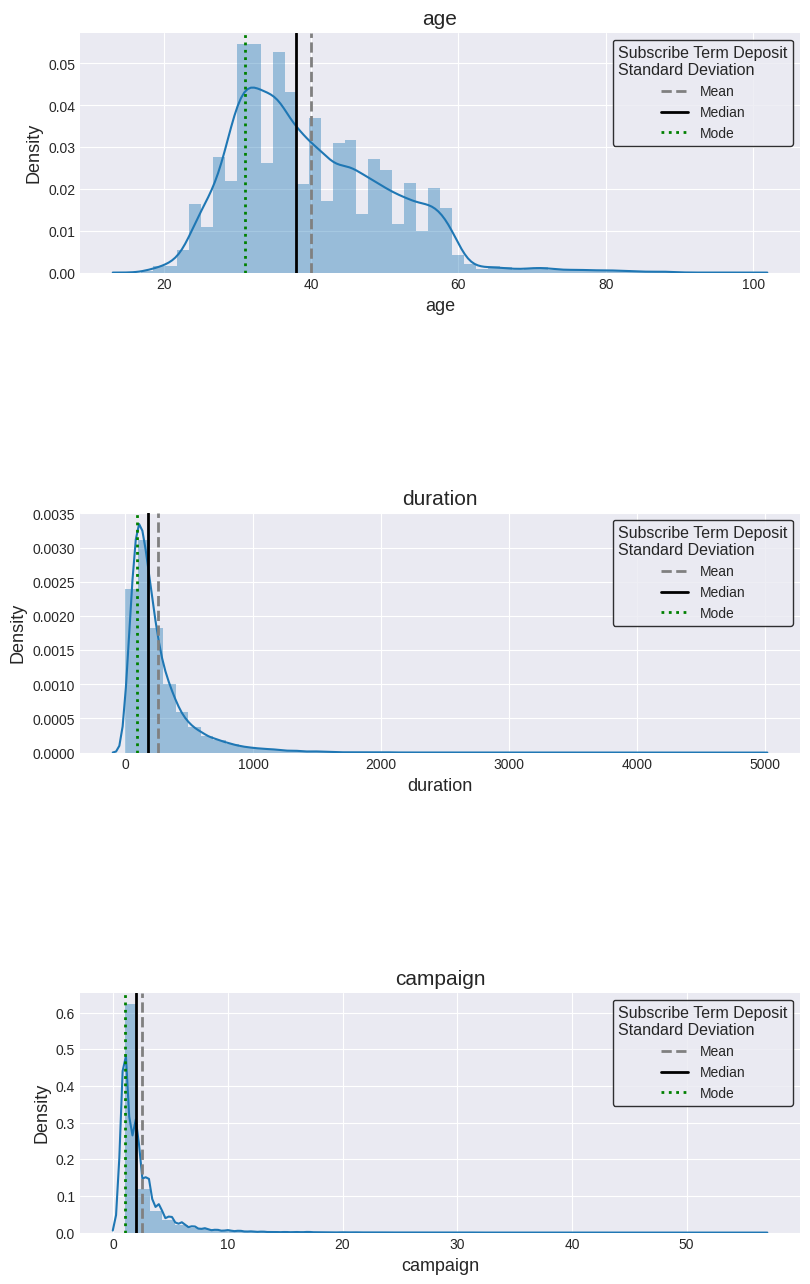

In [53]:
# Ploting Histogram for Each Numerical Variable
plt.style.use("seaborn-darkgrid")

def univariate_numerical(data, num_var):
  """
  Plots histograms for each numerical variable in a pandas DataFrame
  and saves them all in one PNG file (3 subplots per image).

  Args:
      data (pandas.DataFrame): The data to analyze.
      num_var (list): A list of numerical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Numerical_Data.png".
      figsize (tuple, optional): The figure size for the entire image (containing 3 subplots). Defaults to (12, 6).
  """

  # Create a single figure with subplots (3 rows for 3 variables)
  fig, axes = plt.subplots(nrows=3, figsize=(9, 15))  # Adjust rows for the number of variables

  # Iterate through numerical variables and create subplots
  for i, column in enumerate(num_var):
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()
    std = data[column].std()

    sns.distplot(data[column], kde=True, color="#1F77B4", ax=axes[i])
    axes[i].axvline(average, color='grey', linestyle='dashed', linewidth=2, label='Mean')
    axes[i].axvline(median, color='black', linestyle='solid', linewidth=2, label='Median')
    axes[i].axvline(mode[0], color='green', linestyle='dotted', linewidth=2, label='Mode')
    axes[i].set_xlabel(column, fontsize=13)
    axes[i].set_ylabel("Density", fontsize=13)
    axes[i].set_title(column, fontsize=15)

    # Adjust layout for each subplot
    axes[i].legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit\nStandard Deviation', title_fontsize=11.5)

  # Print descriptive statistics (optional)
  for column in num_var:
    average = data[column].mean()
    std = data[column].std()
    median = data[column].median()
    mode = int(data[column].mode())
    print('Statistic summary of {}'.format(column))
    print('Average:', "%.2f" % average)
    print('Standard deviation:', "%.2f" % std)
    print('Median:', "%.2f" % median)
    print('Mode:', mode)
    print('------------------------------')  # Separator between variables

  # Tight layout for better spacing
  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image (containing all 3 subplots)
  plt.savefig("Univariate Analysis Numerical Data After Handling Missing Value.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
num_var = ["age", "duration", "campaign"]
univariate_numerical(data, num_var)

In [54]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

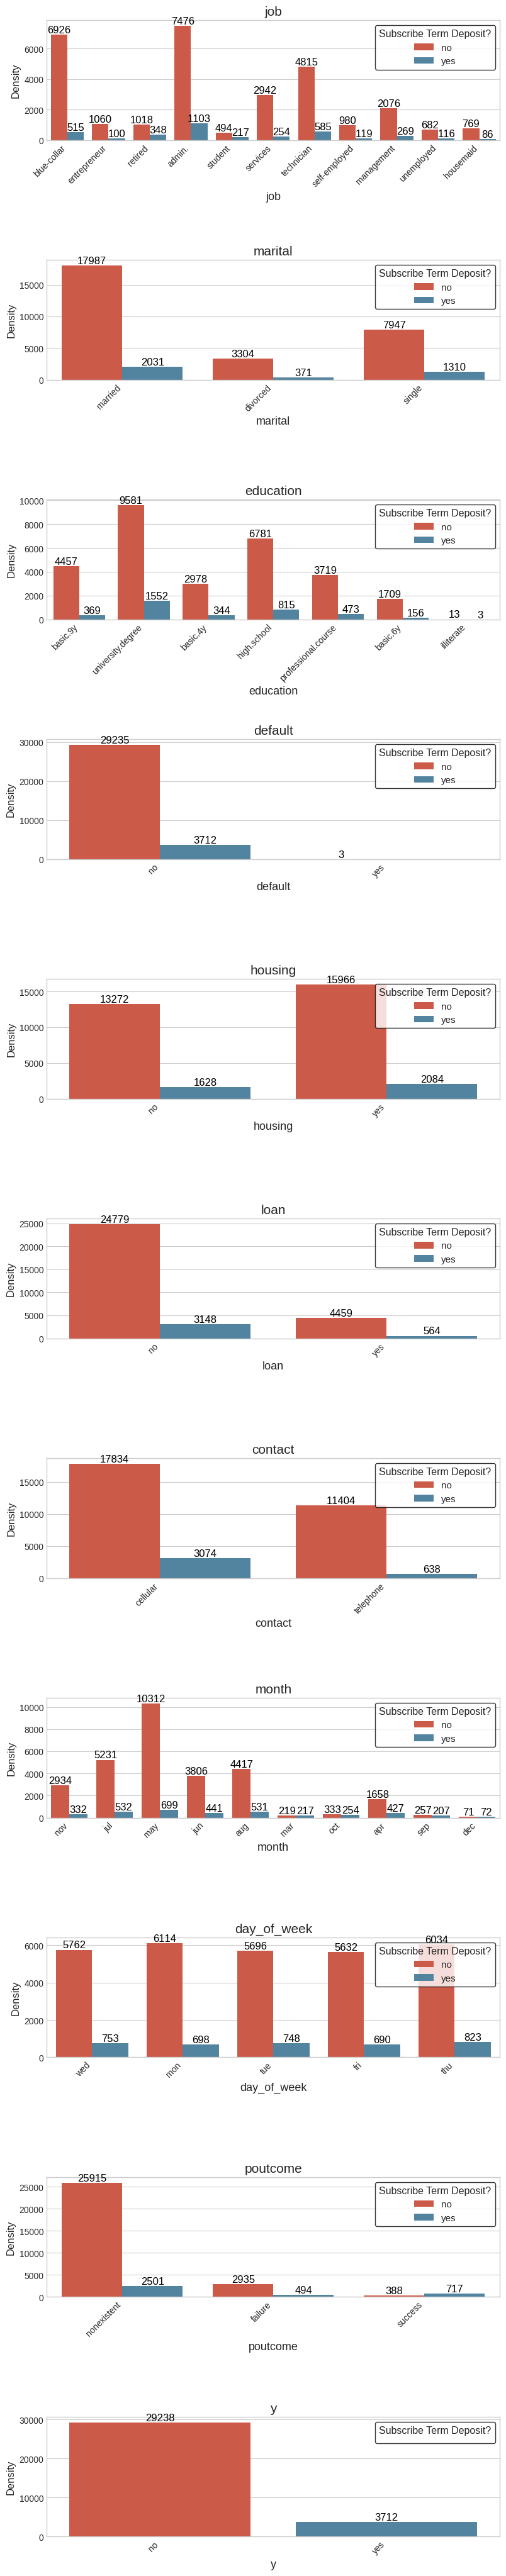

In [55]:
# Ploting Histogram for Each Categorical Variable
plt.style.use("seaborn-whitegrid")

def bivariate_categorical(data, cat_var):
  """
  Plots histograms for each categorical variable in a pandas DataFrame
  and saves them all in one PNG file (3 subplots per image).

  Args:
      data (pandas.DataFrame): The data to analyze.
      cat_var (list): A list of categorical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Categorical_Hist.png".
      figsize (tuple, optional): The figure size for the entire image (containing 3 subplots). Defaults to (12, 6).
  """

  # Create a single figure with subplots (3 rows for 3 variables)
  fig, axes = plt.subplots(nrows=len(cat_var), figsize=(9, 50))  # Adjust rows for number of variables

  # Iterate through categorical variables and create subplots
  for i, column in enumerate(cat_var):
    sns.countplot(x=data[column], hue=data["y"], palette=['#E24A33', '#4586AC'], ax=axes[i])

    # Get unique categories (ticks) for rotation (handles empty or single-value cases)
    categories = data[column].unique()
    if len(categories) > 1:  # Rotate only if there are multiple categories
      axes[i].set_xticks(range(len(categories)))  # Set tick positions explicitly
      axes[i].set_xticklabels(categories, rotation=45, ha='right')  # Set labels with alignment

    for label in axes[i].containers:
      axes[i].bar_label(label, color='black', label_type='edge', fontsize=12)

    axes[i].set_xlabel(column, fontsize=13)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].set_title(column, fontsize=15)

    # Adjust layout for each subplot (optional)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, labels, loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit?', title_fontsize=11.5, fontsize=11)

  # Tight layout for better spacing
  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image (containing all subplots)
  plt.savefig("Bivariate Analysis Categorical Data After Handling Missing Value.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
bivariate_categorical(data, cat_var)

### Drop Duplicates

In [56]:
data_duplicates = len(data)-len(data.drop_duplicates())
print('total duplicates data =', data_duplicates)

total duplicates data = 9


In [57]:
data = data.drop_duplicates()
data.head()

age           job   marital          education default housing loan  \
0   49   blue-collar   married           basic.9y      no      no   no   
1   37  entrepreneur   married  university.degree      no      no   no   
2   78       retired   married           basic.4y      no      no   no   
3   36        admin.   married  university.degree      no     yes   no   
4   59       retired  divorced  university.degree      no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

### Delete Unique Column and Not Use Column

In [58]:
data = data.drop(["pdays", "previous"], axis = 1)

In [59]:
data.head()

age           job   marital          education default housing loan  \
0   49   blue-collar   married           basic.9y      no      no   no   
1   37  entrepreneur   married  university.degree      no      no   no   
2   78       retired   married           basic.4y      no      no   no   
3   36        admin.   married  university.degree      no     yes   no   
4   59       retired  divorced  university.degree      no      no   no   

     contact month day_of_week  duration  campaign     poutcome    y  
0   cellular   nov         wed       227         4  nonexistent   no  
1  telephone   nov         wed       202         2      failure   no  
2   cellular   jul         mon      1148         1  nonexistent  yes  
3  telephone   may         mon       120         2  nonexistent   no  
4   cellular   jun         tue       368         2  nonexistent   no

pdays and previous has dropped

Check Categorical Data Variable for Comparison with Before Being Drop PDays and Previous Column

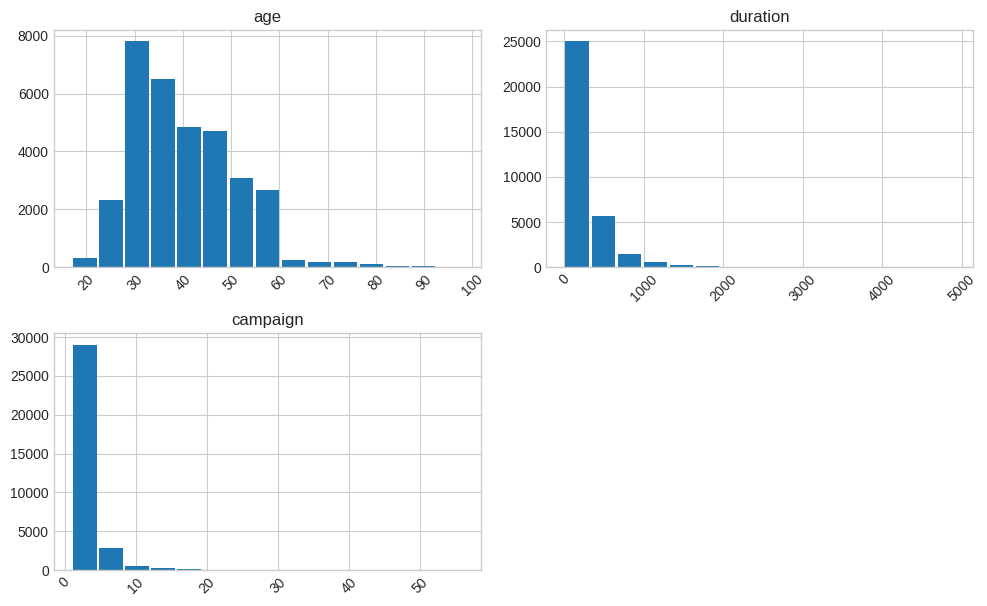

In [60]:
# Membuat Plot Histogram dari Data Kolom Numerik untuk Memeriksa Distribusi Data
data.hist(figsize=(10, 15), layout=(5, 2), grid=True, color='#1F77B4', zorder=2, rwidth=0.9, bins=15, xrot=45)

# Menjauhkan Grafik Agar Tidak Bertabrakan
plt.tight_layout()

# Save data.hist as PNG format
plt.savefig("Numerical Data After Drop PDays and Previous Column.png")

### Handling Outliers

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.

Dibandingin sama Standardisasi, jadi ini nanti dulu

Standardisasi doang dulu, terus handling outliers doang, terus handling outliers baru standardisasi, sama standardisasi baru handling outliers. Total 4 kali percobaan

In [61]:
data.describe()

age      duration      campaign
count  32941.000000  32941.000000  32941.000000
mean      40.013023    258.165660      2.560851
std       10.403121    258.996865      2.752607
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       98.000000   4918.000000     56.000000

age duration and campaign are skewed towards right, we will compute the IQR and replace the outliers with the lower and upper boundaries

In [62]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)

    print(i, ":", lower_bound, ",",  upper_bound)

    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [63]:
lower_boundries

[9.5, -221.0, -2.0]

In [64]:
upper_boundries

[69.5, 643.0, 6.0]

In [65]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1

In [65]:
# without outliers
data.describe()

age      duration      campaign
count  32941.000000  32941.000000  32941.000000
mean      40.013023    258.165660      2.560851
std       10.403121    258.996865      2.752607
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       98.000000   4918.000000     56.000000

Statistic summary of age
Average: 40.01
Standard deviation: 10.40
Median: 38.00
Mode: 31
------------------------------
Statistic summary of duration
Average: 258.17
Standard deviation: 259.00
Median: 180.00
Mode: 90
------------------------------
Statistic summary of campaign
Average: 2.56
Standard deviation: 2.75
Median: 2.00
Mode: 1
------------------------------


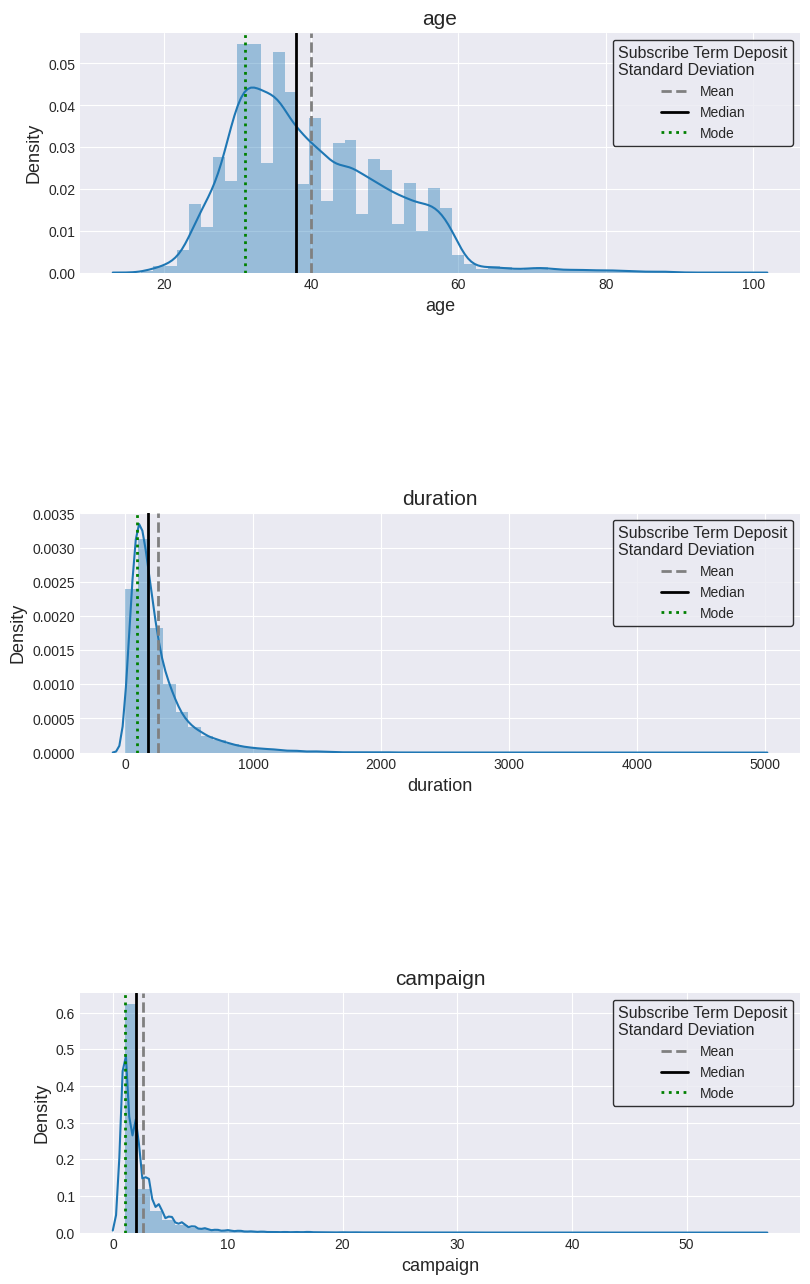

In [66]:
# Ploting Histogram for Each Numerical Variable
plt.style.use("seaborn-darkgrid")

def univariate_numerical(data, num_var):
  """
  Plots histograms for each numerical variable in a pandas DataFrame
  and saves them all in one PNG file (3 subplots per image).

  Args:
      data (pandas.DataFrame): The data to analyze.
      num_var (list): A list of numerical variable names.
      filename (str, optional): The filename for the PNG image. Defaults to "Univariate_Analysis_Numerical_Data.png".
      figsize (tuple, optional): The figure size for the entire image (containing 3 subplots). Defaults to (12, 6).
  """

  # Create a single figure with subplots (3 rows for 3 variables)
  fig, axes = plt.subplots(nrows=3, figsize=(9, 15))  # Adjust rows for the number of variables

  # Iterate through numerical variables and create subplots
  for i, column in enumerate(num_var):
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()
    std = data[column].std()

    sns.distplot(data[column], kde=True, color="#1F77B4", ax=axes[i])
    axes[i].axvline(average, color='grey', linestyle='dashed', linewidth=2, label='Mean')
    axes[i].axvline(median, color='black', linestyle='solid', linewidth=2, label='Median')
    axes[i].axvline(mode[0], color='green', linestyle='dotted', linewidth=2, label='Mode')
    axes[i].set_xlabel(column, fontsize=13)
    axes[i].set_ylabel("Density", fontsize=13)
    axes[i].set_title(column, fontsize=15)

    # Adjust layout for each subplot
    axes[i].legend(loc='best', edgecolor='black', frameon=True, title='Subscribe Term Deposit\nStandard Deviation', title_fontsize=11.5)

  # Print descriptive statistics (optional)
  for column in num_var:
    average = data[column].mean()
    std = data[column].std()
    median = data[column].median()
    mode = int(data[column].mode())
    print('Statistic summary of {}'.format(column))
    print('Average:', "%.2f" % average)
    print('Standard deviation:', "%.2f" % std)
    print('Median:', "%.2f" % median)
    print('Mode:', mode)
    print('------------------------------')  # Separator between variables

  # Tight layout for better spacing
  plt.tight_layout()

  # Adjust spacing between subplots for better readability
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

  # Save the entire figure as a PNG image (containing all 3 subplots)
  plt.savefig("Univariate Analysis Numerical Data After Handling Outliers.png")

# Example usage (assuming you have your data in a DataFrame named 'data')
num_var = ["age", "duration", "campaign"]
univariate_numerical(data, num_var)

### Label Encoder

In [67]:
#categorical features
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [68]:
# check categorical class
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [69]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
  data[column] = label.fit_transform(data[column])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()

# X = data.drop(['y'], axis=1)
# y = data['y']

# cat_var= X.select_dtypes(include= ["object"]).columns
# print(cat_var)

# for column in cat_var:
#   X[column] = label.fit_transform(X[column])

In [70]:
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   78    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1      1148         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

Separating independent and dependent variables

In [71]:
# Feature Variables
x = data.iloc[:, :-1]

# Target Variable
y = data.iloc[:, -1]

Checking Correlation of feature variables

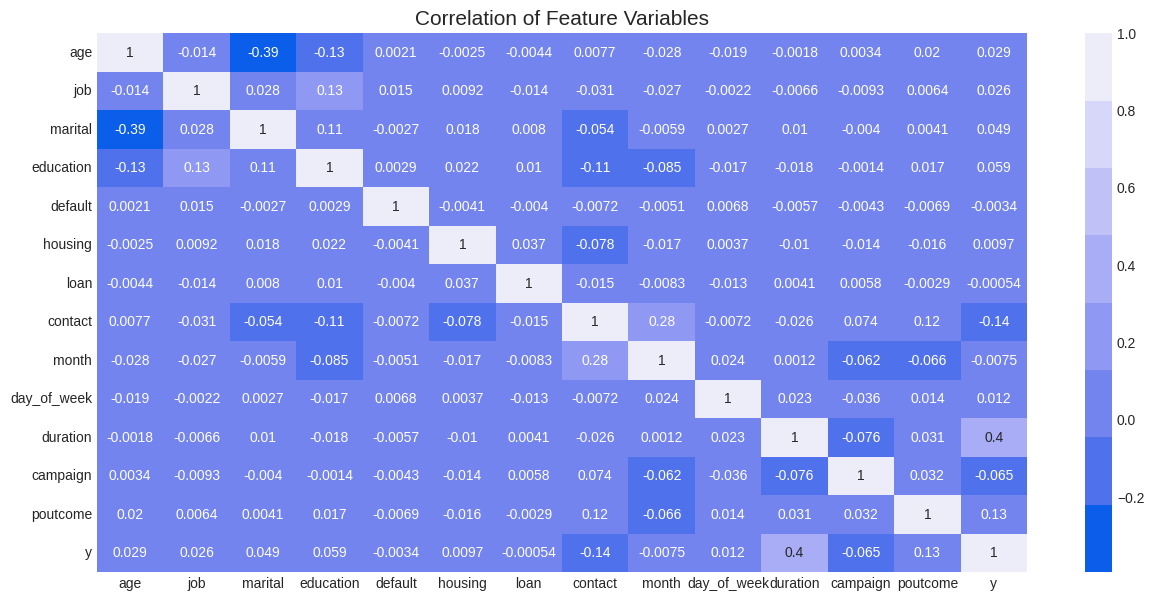

In [72]:
plt.figure(figsize=(15,7))

colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']

sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette(colors, as_cmap=True))
plt.title("Correlation of Feature Variables", fontsize=15)
plt.savefig("Correlation of Feature Variables.png")

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

### Handling Imbalanced Data

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [73]:
y.value_counts()

y
0    29229
1     3712
Name: count, dtype: int64

Opsi 1 X nya 3/4 nya Y

In [ ]:
# initialising oversampling
# smote= SMOTETomek(0.75)

# implementing oversampling to training data
# x_sm, y_sm= smote.fit_sample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
# y_sm.value_counts()

Opsi 2 Disintetiskan (Target Classnya sama)

In [74]:
# Handling imbalance data
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=12, sampling_strategy=1)

In [75]:
# Fit the over sampling
x_sm, y_sm = oversampling.fit_resample(x, y)

In [76]:
y_sm.value_counts()

y
0    29229
1    29229
Name: count, dtype: int64

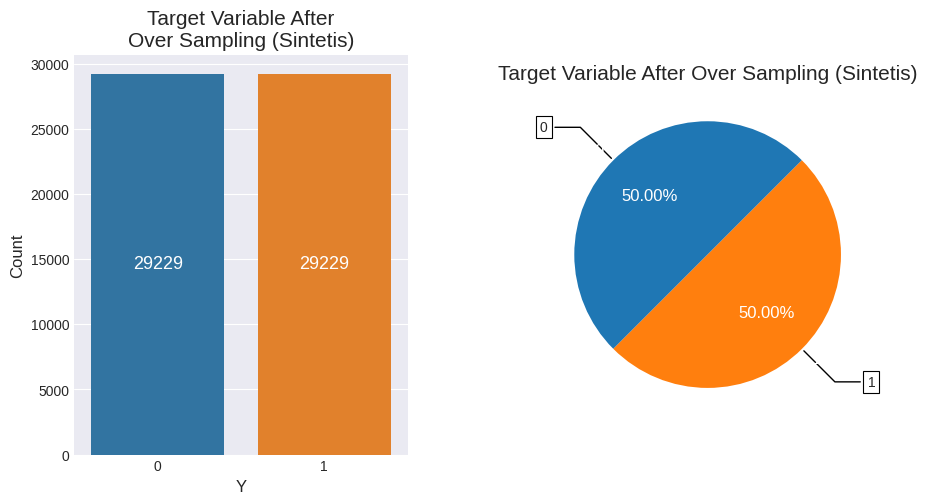

In [77]:
# Menampilkan Grafik Target Class
plt.figure(figsize=(10, 5))

# Subplot #1
# Count of Class in Target Variable (Y)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=y_sm, palette=['#1F77B4', '#FF7F0E'])
for label in ax.containers:
  ax.bar_label(label, color='white', label_type='center', fontsize=13)

plt.xlabel("Y", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target Variable After\nOver Sampling (Sintetis)", fontsize=15)

# Subplot #2
# Percentage of Class in Target Variable (Y)
plt.subplot(1, 2, 2)
df = y_sm.value_counts()
label = df.index
colors = ['#1F77B4', '#FF7F0E']

wedges, texts, autotexts = plt.pie(df, labels=label, autopct='%1.2f%%',
                                   pctdistance=0.62, textprops=dict(color='white', fontsize=12),
                                   startangle=225, counterclock=False, colors=colors)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(label[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.35*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Target Variable After Over Sampling (Sintetis)', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Target Variable After Over Sampling (Sintetis).png")

# Percentage of Class Present in Target Variable (Y)
# print("Percentage of NO and YES\n", data["y"].value_counts()/len(data)*100)
# print("\n\nCount of NO and YES\n", data["y"].value_counts())

### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state = 12)

### Normalization/Standarization

In [79]:
# Import Scaling Library for Scaling
from sklearn.preprocessing import StandardScaler

In [80]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [81]:
x_sm.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [82]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_sm.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_sm.columns)

#### Bandingkan dataset sebelum & setelah normalisasi/standarisasi

In [83]:
# Sebelum standardisasi
x_train.head()

age  job  marital  education  default  housing  loan  contact  month  \
28002   24    0        2          6        0        0     0        0      4   
7766    40    4        1          6        0        1     0        0      1   
5338    60    9        1          3        0        0     0        0      3   
43381   35    0        2          6        0        1     0        0      6   
30189   32    1        1          2        0        0     0        1      6   

       day_of_week  duration  campaign  poutcome  
28002            3       263         1         0  
7766             0       117         3         1  
5338             0       590         8         1  
43381            1       395         3         1  
30189            3      1224         8         1

In [84]:
# Setelah Standardisasi
x_train_scaled.head()

age       job   marital  education  default   housing      loan  \
0 -1.373216 -1.030607  1.474453   1.146836 -0.00801 -0.896408 -0.326776   
1 -0.010947  0.124880 -0.182305   1.146836 -0.00801  1.115563 -0.326776   
2  1.691889  1.569237 -0.182305  -0.365385 -0.00801 -0.896408 -0.326776   
3 -0.436656 -1.030607  1.474453   1.146836 -0.00801  1.115563 -0.326776   
4 -0.692082 -0.741735 -0.182305  -0.869458 -0.00801 -0.896408 -0.326776   

    contact     month  day_of_week  duration  campaign  poutcome  
0 -0.537549 -0.018737     0.875082 -0.342410 -0.520369 -2.094609  
1 -0.537549 -1.301028    -1.415487 -0.754800  0.371616  0.251148  
2 -0.537549 -0.446167    -1.415487  0.581230  2.601577  0.251148  
3 -0.537549  0.836124    -0.651964  0.030436  0.371616  0.251148  
4  1.860296  0.836124     0.875082  2.372018  2.601577  0.251148

## Machine Learning Model

### Gridsearch and Hyperparameter Tuning

#### Logistic Regression

In [85]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8077162836236538
best parameters are: {'C': 0.01, 'penalty': 'l2'}


[[4771 1127]
 [1251 4543]]
0.7966130687649675
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      5898
           1       0.80      0.78      0.79      5794

    accuracy                           0.80     11692
   macro avg       0.80      0.80      0.80     11692
weighted avg       0.80      0.80      0.80     11692



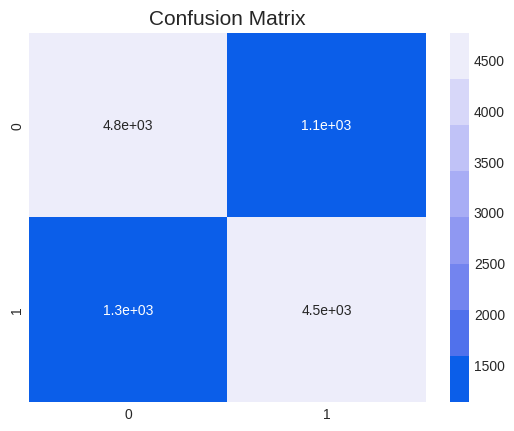

In [86]:
# checking model performance
y_predicted= gridsearch_log.predict(x_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)

colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']
sns.heatmap(cm, annot=True, cmap=sns.color_palette(colors, as_cmap=True))
plt.title("Confusion Matrix Logistic Regression", fontsize=15)
plt.savefig("Confusion Matrix Logistic Regression.png")

print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [87]:
# Check gridsearch_log

gridsearch_log

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=2)

#### Random Forest

In [88]:
# random forest
rf= RandomForestClassifier()

rf_param= {
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy']
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9078633650293112
best parameters are: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}


[[5188  710]
 [ 357 5437]]
0.9087410195005132
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5898
           1       0.88      0.94      0.91      5794

    accuracy                           0.91     11692
   macro avg       0.91      0.91      0.91     11692
weighted avg       0.91      0.91      0.91     11692



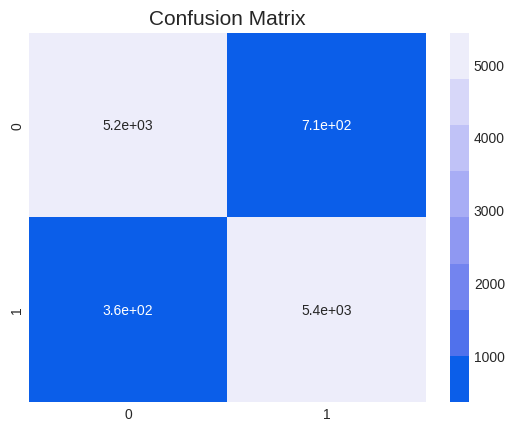

In [89]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_rf))

colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True, cmap=sns.color_palette(colors, as_cmap=True))
plt.title("Confusion Matrix Random Forest", fontsize=15)
plt.savefig("Confusion Matrix Random Forest.png")

print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

[[5188  710]
 [ 357 5437]]
0.9087410195005132
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5898
           1       0.88      0.94      0.91      5794

    accuracy                           0.91     11692
   macro avg       0.91      0.91      0.91     11692
weighted avg       0.91      0.91      0.91     11692



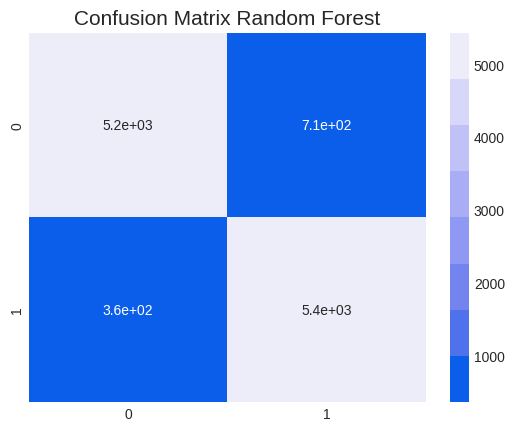

In [102]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_rf))

colors = ['#0B5EE9', '#5071EC', '#7384EF', '#8F98F2', '#A8ADF5', '#C0C2F7', '#D7D7F9', '#EDEDFA']
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True, cmap=sns.color_palette(colors, as_cmap=True))
plt.title("Confusion Matrix Random Forest", fontsize=15)
plt.savefig("Confusion Matrix Random Forest.png")

print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

In [90]:
# Check randomsearch_rf

randomsearch_rf

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='f1_macro', verbose=2)

### Save Models

In [91]:
# Save Models
import joblib

# Logistic Regression Model
with open("logistic regression model.pkl", "wb") as model_file:
  joblib.dump(gridsearch_log, model_file)

# Random Forest Model
with open("random forest model.pkl", "wb") as model_file:
  joblib.dump(randomsearch_rf, model_file)

### Load Models

In [92]:
# Load Models

# Logistic Regression Model
with open("logistic regression model.pkl", "rb") as model_file:
  logistic_regression_model = joblib.load(model_file)

# Random Forest Model
with open("random forest model.pkl", "rb") as model_file:
  random_forest_model = joblib.load(model_file)

### Prediction on The Test dataset

We have to perform the same preprocessing operations on the test data that we have performed on the train data. But here we already have preprocessed data which is present in the csv file new_test.csv

In [93]:
test_data= pd.read_csv("/content/new_test.csv")
test_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   32    4        0          6        0        0     0        0      3   
1   37   10        3          6        0        0     0        0      4   
2   55    5        0          5        1        2     0        0      3   
3   44    2        1          0        1        0     0        1      4   
4   28    0        2          3        0        0     0        0      5   

   day_of_week  duration  campaign  poutcome  
0            3       131         5         1  
1            3       100         1         1  
2            2       131         2         1  
3            3        48         2         1  
4            0       144         2         1

In [94]:
# Compare with The First Train Dataset
cek_data = pd.read_csv("/content/new_train.csv")
cek_data.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [105]:
# Compare with The First Train Dataset Again After Data Preprocessing and Feature Engineering
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   78    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1      1148         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

Random Forest classifier has given the best metric score on the validation data.

In [96]:
# predicting the test data
y_predicted= randomsearch_rf.predict(test_data)
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [97]:
# dataset of predicted values for target variable y
prediction= pd.DataFrame(y_predicted, columns=["y_predicted"])
prediction_dataset= pd.concat([test_data, prediction], axis=1)
prediction_dataset.head(50)

age  job  marital  education  default  housing  loan  contact  month  \
0    32    4        0          6        0        0     0        0      3   
1    37   10        3          6        0        0     0        0      4   
2    55    5        0          5        1        2     0        0      3   
3    44    2        1          0        1        0     0        1      4   
4    28    0        2          3        0        0     0        0      5   
5    45   10        1          2        0        0     0        0      1   
6    55    0        0          6        0        0     0        0      7   
7    46    0        1          3        0        0     0        1      4   
8    53    1        2          2        0        2     0        0      3   
9    30    0        2          6        0        0     0        0      1   
10   55    4        1          7        0        2     0        0      9   
11   39    1        1          2        1        0     0        0      3   
12   55    1        1          2        0        2     0        0      0   
13   55    0        0          6        0        0     0        1      7   
14   46    4        1          2        0        0     0        1      6   
15   35    1        1          2        1        0     0        1      6   
16   43    6        1          6        0        2     0        0      5   
17   37    6        1          3        0        0     0        1      6   
18   30    9        1          5        0        2     2        1      4   
19   55    5        1          3        0        0     0        0      7   
20   38   10        2          3        0        2     0        1      6   
21   55    5        1          7        0        0     2        0      1   
22   34    1        1          2        0        2     0        1      6   
23   30    9        2          5        0        0     2        1      3   
24   55    4        0          6        0        2     0        0      0   
25   34    1        1          0        0        2     0        1      6   
26   33    9        0          5        0        2     0        1      6   
27   44    4        1          2        0        0     0        0      6   
28   43    7        1          0        0        2     0        0      7   
29   34    0        1          6        0        2     0        0      6   
30   41    0        1          3        0        2     0        0      7   
31   48    1        1          2        1        0     0        1      4   
32   41    7        1          2        0        2     2        1      6   
33   28    1        2          1        1        2     0        0      6   
34   36    7        1          3        0        2     0        1      6   
35   30    1        1          2        0        2     0        1      6   
36   43    2        1          6        0        0     0        1      6   
37   50    1        1          0        1        0     0        0      1   
38   45    9        0          5        1        2     0        0      1   
39   34    9        1          3        0        2     2        0      7   
40   39    9        1          5        0        1     1        0      3   
41   33    1        1          1        0        0     0        1      3   
42   34    1        1          2        0        0     0        1      4   
43   35    4        1          6        0        0     0        0      1   
44   43    1        1          0        0        2     0        1      4   
45   41    9        1          5        0        0     2        1      6   
46   52    0        0          1        0        2     0        1      4   
47   46    0        1          3        1        2     2        1      6   
48   53    2        0          6        0        0     0        1      7   
49   51    6        1          2        0        2     0        1      6   

    day_of_week  duration  campaign  poutcome  y_predicted  
0             3       131         5         1            0  
1    

In [98]:
prediction_dataset["y_predicted"].unique()

array([0, 1])

In [99]:
data["y"].unique()

array([0, 1])

y_predicted column in prediction_dataset and y column in data

0 is no

1 is yes

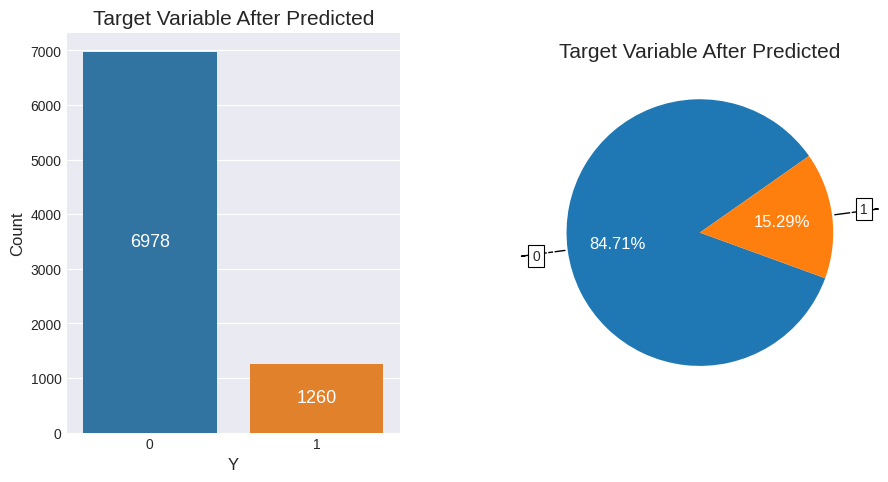

In [100]:
# Menampilkan Grafik Target Class
plt.figure(figsize=(10, 5))

# Subplot #1
# Count of Class in Target Variable (Y)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=y_predicted, palette=['#1F77B4', '#FF7F0E'])
for label in ax.containers:
  ax.bar_label(label, color='white', label_type='center', fontsize=13)

plt.xlabel("Y", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target Variable After Predicted", fontsize=15)

# Subplot #2
# Percentage of Class in Target Variable (Y)
plt.subplot(1, 2, 2)

# Convert y_predicted to a Pandas Series
y_predicted_series = pd.Series(y_predicted)

df = y_predicted_series.value_counts()
label = df.index
colors = ['#1F77B4', '#FF7F0E']

wedges, texts, autotexts = plt.pie(df, labels=label, autopct='%1.2f%%',
                                   pctdistance=0.62, textprops=dict(color='white', fontsize=12),
                                   startangle=340, counterclock=False, colors=colors)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(label[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.35*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Target Variable After Predicted', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Target Variable After Predicted.png")

# Percentage of Class Present in Target Variable (Y)
# print("Percentage of NO and YES\n", data["y"].value_counts()/len(data)*100)
# print("\n\nCount of NO and YES\n", data["y"].value_counts())

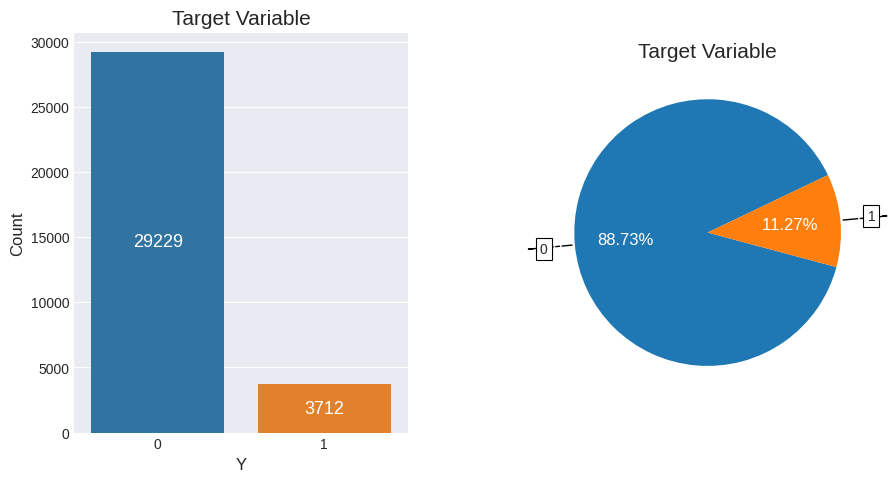

In [102]:
# Menampilkan Grafik Target Class
plt.figure(figsize=(10, 5))

# Subplot #1
# Count of Class in Target Variable (Y)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=data["y"], palette=['#1F77B4', '#FF7F0E'])
for label in ax.containers:
  ax.bar_label(label, color='white', label_type='center', fontsize=13)

plt.xlabel("Y", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target Variable", fontsize=15)

# Subplot #2
# Percentage of Class in Target Variable (Y)
plt.subplot(1, 2, 2)
df = data['y'].value_counts()
label = df.index
colors = ['#1F77B4', '#FF7F0E']

wedges, texts, autotexts = plt.pie(df, labels=label, autopct='%1.2f%%',
                                   pctdistance=0.62, textprops=dict(color='white', fontsize=12),
                                   startangle=345, counterclock=False, colors=colors)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(label[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.35*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Target Variable', fontsize=15)

plt.tight_layout()

# Adjust spacing between subplots for better readability
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Save Target Variable as PNG Format (PICTURE)
plt.savefig("Target Variable Again.png")

# Percentage of Class Present in Target Variable (Y)
# print("Percentage of NO and YES\n", data["y"].value_counts()/len(data)*100)
# print("\n\nCount of NO and YES\n", data["y"].value_counts())

# **Footnotes**

This project was worked on while doing a virtual internship at ID/X Partners x Rakamin Academy (Jan - Feb 2024)